### Sustainable and Entrepreneurial Finance

### Assignment 1 - Portfolio allocation

#### Group 8 - Energy Firms With Available Scope 1 to 3 emissions (TRUCOST)



#### Useful imports:


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy.optimize import minimize
import prettytable
import plotly.graph_objects as go
import os
import math
import plotly.express as px

random.seed(0) # Setting random seed to 0
%matplotlib inline


### 0 - Importing and preparing datasets for calculation.

Importing the files and creating the raw pandas data frames (it might take a while...).


In [2]:
# Setting path names

github_path = 'https://github.com/percw/Sustainable_and_Entrepreneurial_Finance/blob/master/Data_Excel'

path_gics = f'{github_path}/Trucost_CO2emissions/GICS_map%202018.xlsx?raw=true'
path_sector = f'{github_path}/Trucost_CO2emissions/sector.xlsx?raw=True'
path_returns = f'{github_path}/MSCI_ESGscores/Returns/monthlyreturns.xlsx?raw=True'
path_caps = f'{github_path}/MSCI_ESGscores/Fundamentals/size.xlsx?raw=True'

# Scope paths
path_scope1 = f'{github_path}/Trucost_CO2emissions/scope1.xlsx?raw=true'
path_scope2 = f'{github_path}/Trucost_CO2emissions/scope2.xlsx?raw=true'
path_scope3 = f'{github_path}/Trucost_CO2emissions/scope3.xlsx?raw=true'

# Local paths in case of very slow loading...
#path_gics = './Data_Excel/Trucost_CO2emissions/GICS_map 2018.xlsx'
#path_sector = './Data_Excel/Trucost_CO2emissions/sector.xlsx'
#path_returns = './Data_Excel/MSCI_ESGscores/Returns/monthlyreturns.xlsx'
#path_caps = './Data_Excel/MSCI_ESGscores/Fundamentals/size.xlsx'

# Reading excel files and creating pandas data frames
df_gics_raw = pd.read_excel(path_gics)
df_sector_raw = pd.read_excel(path_sector)
df_returns_raw = pd.read_excel(path_returns)
df_caps_raw = pd.read_excel(path_caps)

df_scope1_raw = pd.read_excel(path_scope1)
df_scope2_raw = pd.read_excel(path_scope2)
df_scope3_raw = pd.read_excel(path_scope3)


Renaming and copying the raw dataframes for convenience, so if we need to rerun som code we don't need to wait for the excel files to be loaded.


In [3]:
df_gics = df_gics_raw.copy()
df_sector = df_sector_raw.copy()
df_returns = df_returns_raw.copy()
df_caps = df_caps_raw.copy()
df_scope1 = df_scope1_raw.copy()
df_scope2 = df_scope2_raw.copy()
df_scope3 = df_scope3_raw.copy()

Renaming the index for returns and market caps from '`Unnamed: 0`' to '`date`'.


In [4]:
# Renaming index data column

df_returns.rename(columns={'Unnamed: 0': 'date'}, inplace=True)
df_caps.rename(columns={'Unnamed: 0': 'date'}, inplace=True)
display(df_returns)
display(df_caps)


,date,AEA000201011,AEA001501013,AEA002001013,AED000201015,AED000601016,AED000901010,AED001301012,AED001501017,AEDFXA0M6V00,...,ZAE000216537,ZAE000221370,ZAE000248498,ZAE000248506,ZAE000255360,ZAE000255915,ZAE000259479,ZAE000259701,ZAE000265971,ZAE000269890
0,2002-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.057260,NaN,NaN,-0.134138,-0.111384,NaN,NaN,NaN,-0.137366
1,2002-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.111637,NaN,NaN,0.062539,-0.224885,NaN,NaN,NaN,0.065310
2,2002-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.206354,NaN,NaN,0.007652,0.096314,NaN,NaN,NaN,-0.080122
3,2002-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.084209,NaN,NaN,0.090537,-0.104393,NaN,NaN,NaN,-0.198591
4,2002-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.513709,NaN,NaN,0.088148,0.315774,NaN,NaN,NaN,0.406500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,2020-08-31,0.012045,1.087475,-0.050000,-0.005255,0.008674,-0.007831,0.196843,0.000000,0.0,...,-0.050505,-0.010927,-0.043621,-0.194835,-0.029779,-0.094230,-0.116505,0.310495,-0.023609,-0.106407
224,2020-09-30,0.107170,-0.364762,0.205592,0.086644,0.043186,0.059195,0.009310,-0.015075,0.0,...,0.067376,0.037906,0.091790,-0.113688,0.068572,0.107444,0.040293,0.107116,-0.056995,-0.002759
225,2020-10-31,0.008931,-0.310345,-0.019782,0.043485,-0.049642,-0.023100,0.027671,0.030612,0.0,...,-0.079734,-0.002112,0.056919,-0.162197,-0.144279,0.111818,0.158451,-0.102972,0.120879,0.037288
226,2020-11-30,0.021308,0.000000,0.334029,-0.053265,-0.008674,-0.038902,0.218399,-0.108911,0.0,...,-0.115523,0.024140,-0.007411,0.167759,-0.004542,0.000136,0.072948,0.086030,0.352941,-0.155407


,date,AEA000201011,AEA001501013,AEA002001013,AED000201015,AED000601016,AED000901010,AED001301012,AED001501017,AEDFXA0M6V00,...,ZAE000216537,ZAE000221370,ZAE000248498,ZAE000248506,ZAE000255360,ZAE000255915,ZAE000259479,ZAE000259701,ZAE000265971,ZAE000269890
0,2007-01-31,6534700000,758897000.0,1859940000,6350640000,2305090000,NaN,NaN,NaN,NaN,...,NaN,2.072570e+09,NaN,NaN,18552700000,12380100000,NaN,NaN,NaN,1.237120e+09
1,2007-02-28,6611120000,751838000.0,2235750000,6503290000,2391120000,NaN,NaN,NaN,NaN,...,NaN,1.966200e+09,NaN,NaN,19039600000,12764800000,NaN,NaN,NaN,1.233470e+09
2,2007-03-31,5980720000,838744000.0,1940260000,5319980000,2506660000,NaN,NaN,NaN,NaN,...,NaN,2.143880e+09,NaN,NaN,16878100000,12948100000,NaN,NaN,NaN,1.202500e+09
3,2007-04-30,6534350000,714754000.0,2329490000,6060680000,2630020000,NaN,NaN,NaN,NaN,...,NaN,2.478330e+09,NaN,NaN,18710200000,13936100000,NaN,NaN,NaN,1.401440e+09
4,2007-05-31,7647060000,923382000.0,3405840000,8077450000,2808010000,NaN,NaN,NaN,NaN,...,NaN,2.277380e+09,NaN,NaN,17881000000,12799400000,NaN,NaN,NaN,1.362000e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,2020-08-31,10494400000,NaN,4345770000,8082950000,1412400000,1.888480e+09,1.447930e+09,261378000.0,1.347090e+10,...,5.543370e+09,NaN,1.007220e+09,1.007220e+09,3111030000,3866810000,2.096430e+09,NaN,2.531580e+09,1.340430e+09
164,2020-09-30,10702800000,NaN,4302950000,8516670000,1331360000,1.825310e+09,1.517110e+09,291872000.0,1.347090e+10,...,5.176610e+09,NaN,1.027260e+09,1.027260e+09,2915080000,4525010000,2.436750e+09,NaN,2.561640e+09,1.387060e+09
165,2020-10-31,11119500000,NaN,5865720000,8201230000,1319780000,1.823130e+09,1.795500e+09,250487000.0,1.347090e+10,...,4.598340e+09,NaN,1.037060e+09,1.037060e+09,2718960000,4536810000,2.692790e+09,NaN,3.649600e+09,1.198440e+09
166,2020-11-30,11517300000,NaN,6507950000,8832100000,1447130000,1.901550e+09,1.943750e+09,250487000.0,1.347090e+10,...,6.058280e+09,NaN,1.178770e+09,1.178770e+09,3558920000,6040410000,3.266010e+09,NaN,3.722370e+09,1.528570e+09


Getting the ISIN codes for the energy companies.


In [5]:
industry_code = 1010.0  # based on Global Industry Classification Standard GICS
df_energy = df_sector.loc[df_sector['GICSIG'] == industry_code]
energy_isin = df_energy['ISIN'].values.tolist()

Getting the returns for the companies matching the ISIN codes in `energy_isin`.


In [6]:
# List of all ISIN codes to iterate through
return_cols = df_returns.columns.values.tolist()
display(len(return_cols))
display(len(return_cols) == df_returns.shape[1])

# Creating a list with all the ISIN Energy codes that the returns.xlsx datasheet contains
both = []
for c in return_cols:
    if c in energy_isin:
        both.append(c)


5141

True

We have 5141 columns, and the same amount of columns in df_returns.


Checking the shape and general characteristics of our new list.


In [7]:
display(return_cols[:4])
display(energy_isin[:4])
display(both[:4])
display(len(return_cols))
display(len(energy_isin))
display(len(both))


['date', 'AEA000201011', 'AEA001501013', 'AEA002001013']

['AED000701014', 'AN8068571086', 'ARP9897X1319', 'ARPERE010103']

['AN8068571086', 'AU000000AOE6', 'AU000000ERA9', 'AU000000ORG5']

5141

773

223

Manually checking that the first four columns and companies to the ones displayed above in `df_returns`.


Inserting the date column.


In [8]:
if 'date' not in energy_isin:
    energy_isin.insert(0, 'date')

energy_isin[:4]


['date', 'AED000701014', 'AN8068571086', 'ARP9897X1319']

Now we will make sure that the energy companies have Scope 1-3 data. 

In [9]:
scope1_nrg = df_scope1[df_scope1['ISIN'].isin(energy_isin)]
scope2_nrg = df_scope2[df_scope2['ISIN'].isin(energy_isin)]
scope3_nrg = df_scope3[df_scope3['ISIN'].isin(energy_isin)]
display(scope1_nrg.shape)
display(scope2_nrg.shape)
display(scope3_nrg.shape)
scope3_nrg

(773, 24)

(773, 24)

(773, 24)

,ISIN,NAME,x1999,x2000,x2001,x2002,x2003,x2004,x2005,x2006,...,x2011,x2012,x2013,x2014,x2015,x2016,x2017,x2018,x2019,x2020
14,AED000701014,DANA GAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,6.328905e+04,6.719899e+04,4.062009e+04,4.298060e+04,5.199513e+04,5.090630e+04,4.546945e+04,NaN
40,AN8068571086,SCHLUMBERGER,NaN,NaN,NaN,NaN,NaN,NaN,4.168041e+06,5.029795e+06,...,1.006269e+07,1.014331e+07,1.073002e+07,1.148169e+07,8.403324e+06,6.905174e+06,8.648838e+06,8.716874e+06,8.118175e+06,NaN
49,ARP9897X1319,YPF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.092536e+06,5.887649e+06,5.605806e+06,6.403399e+06,6.239900e+06,6.860782e+06,5.520290e+06,NaN
50,ARPERE010103,PETROBRAS ENERGIA 'B' DEAD - DELIST.22/05/18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,7.382140e+05,7.640836e+05,NaN,NaN,NaN,NaN,NaN
84,AT0000946652,SCHOELLER-BLECKMANN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.904372e+04,1.272702e+05,1.515030e+05,1.295256e+05,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17427,VN000000TDN1,VINACOMIN - DEON,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.357555e+04,NaN
17428,VN000000THT9,VINACOMIN - HA T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.383430e+04,NaN
17443,ZAE000006896,SASOL,NaN,NaN,NaN,NaN,NaN,NaN,5.650831e+06,4.480603e+06,...,7.408594e+06,6.080224e+06,6.405420e+06,6.965466e+06,4.164291e+06,4.158845e+06,5.125700e+06,4.768286e+06,4.123679e+06,NaN
17539,ZAE000151353,MVELASERVE DEAD - 12/11/13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.282491e+04,1.253559e+04,1.188194e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
scope1_isin = df_scope1['ISIN'].values.tolist()

In [11]:
# Count the number of NaNs in each row
n_nulls_1 = scope1_nrg.isna().sum(axis=1)

# Filter the rows with 22 NaN values
no_scope_1 = scope1_nrg[n_nulls_1 == 22]

display(no_scope_1)

,ISIN,NAME,x1999,x2000,x2001,x2002,x2003,x2004,x2005,x2006,...,x2011,x2012,x2013,x2014,x2015,x2016,x2017,x2018,x2019,x2020


In [12]:
# Count the number of NaNs in each row
n_nulls_2 = scope2_nrg.isna().sum(axis=1)

# Filter the rows with 22 NaN values
no_scope_2 = scope2_nrg[n_nulls_2 == 22]

display(no_scope_2)

,ISIN,NAME,x1999,x2000,x2001,x2002,x2003,x2004,x2005,x2006,...,x2011,x2012,x2013,x2014,x2015,x2016,x2017,x2018,x2019,x2020


In [13]:
# Count the number of NaNs in each row
n_nulls_3 = scope3_nrg.isna().sum(axis=1)

# Filter the rows with 22 NaN values
no_scope_3 = scope3_nrg[n_nulls_3 == 22]

display(no_scope_3)

,ISIN,NAME,x1999,x2000,x2001,x2002,x2003,x2004,x2005,x2006,...,x2011,x2012,x2013,x2014,x2015,x2016,x2017,x2018,x2019,x2020


So all firms in these datasets have at least one value for each scope 1, 2, and 3. Now we must make sure that the ISINs we work with are part of these ISINs.

In [14]:
scope1_nrg_isin = scope1_nrg['ISIN'].values.tolist()
scope2_nrg_isin = scope2_nrg['ISIN'].values.tolist()
scope3_nrg_isin = scope3_nrg['ISIN'].values.tolist()

Checking if there are any differences between the companies in the respective Scope 1-3 list.

In [15]:
if set(scope1_nrg_isin) == set(scope2_nrg_isin):
    print("scope1_nrg_isin and scope2_nrg_isin have the same elements (order doesn't matter)")
else:
    print("The two lists are different")
    
if set(scope1_nrg_isin) == set(scope3_nrg_isin):
    print("scope1_nrg_isin and scope3_nrg_isin have the same elements (order doesn't matter)")
else:
    print("The two lists are different")

scope1_nrg_isin and scope2_nrg_isin have the same elements (order doesn't matter)
scope1_nrg_isin and scope3_nrg_isin have the same elements (order doesn't matter)


All companies in Scope 1 are in Scope 2 and Scope 3. Thats good.

Putting together the return data for the energy companies.


In [16]:
nrg_returns = df_returns[df_returns.columns.intersection(energy_isin)]
display(nrg_returns)

# Checking the datatypes.
display(nrg_returns.dtypes.unique())


,date,AN8068571086,AU000000AOE6,AU000000ERA9,AU000000ORG5,AU000000PDN8,AU000000WHC8,AU000000WOR2,BE0003816338,BMG2108M2182,...,US8475601097,US86764P1093,RU000A0B6NK6,US87612G1013,US9026531049,US91913Y1001,US9694571004,US98385X1063,ARP9897X1319,ZAE000006896
0,2002-01-31,0.115662,0.152793,0.005659,-0.031864,-0.091918,NaN,NaN,NaN,-0.039490,...,NaN,0.021051,NaN,NaN,0.002783,0.040387,-0.027370,0.078207,0.455740,0.049202
1,2002-02-28,0.004551,-0.076059,0.075563,0.034254,0.947644,NaN,NaN,NaN,0.026525,...,NaN,0.032410,NaN,NaN,0.002702,0.207248,-0.255487,-0.050850,-0.100205,0.071560
2,2002-03-31,0.069747,0.250782,0.032138,0.046824,-0.051075,NaN,NaN,NaN,-0.040052,...,NaN,0.018067,NaN,NaN,0.012703,-0.055308,-0.157891,0.131839,-0.102242,0.048680
3,2002-04-30,-0.011214,0.161899,0.026068,0.072392,0.106704,NaN,NaN,NaN,-0.056528,...,NaN,0.036674,NaN,NaN,0.108710,0.130936,0.497679,0.096313,0.023116,0.123294
4,2002-05-31,-0.033508,-0.076482,-0.084686,0.054394,-0.104949,NaN,NaN,NaN,0.000000,...,NaN,-0.128155,NaN,NaN,0.063592,-0.111495,-0.186524,0.008259,-0.015311,-0.022361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,2020-08-31,0.056431,0.025929,0.059829,-0.030567,0.221436,-0.051895,-0.087717,0.192621,0.001988,...,0.0,0.000000,-0.040000,-0.015564,-0.087904,-0.027463,0.048380,0.000000,0.286645,0.082327
224,2020-09-30,0.001871,0.038956,0.102151,0.026130,0.412873,-0.301476,0.253637,-0.037486,-0.034939,...,0.0,0.000000,-0.020833,-0.096853,-0.014810,-0.026711,0.062879,0.000000,-0.143275,0.036017
225,2020-10-31,-0.194313,-0.026587,-0.112195,-0.210594,-0.255603,0.193846,-0.000491,-0.039670,-0.147194,...,0.0,0.000000,-0.021277,-0.199779,-0.023121,-0.232324,-0.086246,0.000000,-0.258657,-0.096972
226,2020-11-30,0.037976,-0.019773,-0.052198,-0.102304,-0.095238,-0.081615,-0.061808,-0.135534,-0.106459,...,0.0,0.000000,-0.108696,0.190719,-0.020107,-0.009433,-0.000533,0.000000,-0.083209,-0.291075


array([dtype('<M8[ns]'), dtype('float64')], dtype=object)

The dataset looks good. We have only float64 values which is as expected and good. Additionally we see that we have 223 columns which is the same as the length of the ISIN list created in the codeblock above.


Now we can filter on the targeted dates which is from 01.01.2005 to 31.12.2020. We'll use a mask to get the observations in this timeframe.


In [17]:
start_date = '2005-01-01'
end_date = '2020-12-31'

# Greater than or equal to the start date and smaller than or equal the end date
mask = (nrg_returns['date'] >= start_date) & (nrg_returns['date'] <= end_date)

nrg_returns = nrg_returns.loc[mask]

display(nrg_returns.iloc[0][0])
display(nrg_returns.iloc[-1][0])


Timestamp('2005-01-31 00:00:00')

Timestamp('2020-12-31 00:00:00')

Here we can see that the first and the last column has the correct dates.


Dropping the `NaN` values for companies that have more than 36 months of no return data.


In [18]:
# Drop all companies that have 36 NAN values (3 years) or more
years = 3
months = 12
too_many_nans = years*months

nrg_returns = nrg_returns.dropna(
    thresh=len(nrg_returns) - too_many_nans, axis=1)
nrg_returns


,date,AN8068571086,AU000000AOE6,AU000000ERA9,AU000000ORG5,AU000000PDN8,AU000000WHC8,AU000000WOR2,BE0003816338,BMG2108M2182,...,US8454671095,US8475601097,US86764P1093,RU000A0B6NK6,US9026531049,US91913Y1001,US9694571004,US98385X1063,ARP9897X1319,ZAE000006896
36,2005-01-31,0.012603,-0.087586,0.032408,0.001413,-0.058855,NaN,0.053326,-0.221404,-0.000471,...,-0.106096,NaN,-0.031204,NaN,0.047824,-0.035393,-0.046450,-0.060108,0.028704,0.088215
37,2005-02-28,0.063502,-0.006316,0.509758,0.008180,0.818187,NaN,0.037500,0.031757,-0.012241,...,0.150111,NaN,0.161942,NaN,-0.069058,0.322805,0.092083,0.108183,0.094693,-0.087507
38,2005-03-31,0.093039,0.131431,0.188845,0.023138,0.373450,NaN,0.130329,0.230611,0.163489,...,0.057778,NaN,0.080660,NaN,-0.008869,0.196423,0.077830,0.183483,0.258207,0.231228
39,2005-04-30,-0.038401,-0.053780,-0.130408,0.031135,-0.114356,NaN,0.049456,0.038771,0.140516,...,0.040317,NaN,0.107051,NaN,-0.067113,0.142520,0.045476,0.067322,-0.103228,0.002223
40,2005-05-31,-0.027085,-0.122518,-0.048968,-0.014060,-0.006077,NaN,0.004279,0.031982,0.000359,...,0.123802,NaN,-0.066758,NaN,0.083772,-0.118698,-0.084998,-0.109858,-0.011597,-0.042448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,2020-08-31,0.056431,0.025929,0.059829,-0.030567,0.221436,-0.051895,-0.087717,0.192621,0.001988,...,0.079365,0.0,0.000000,-0.040000,-0.087904,-0.027463,0.048380,0.000000,0.286645,0.082327
224,2020-09-30,0.001871,0.038956,0.102151,0.026130,0.412873,-0.301476,0.253637,-0.037486,-0.034939,...,-0.022058,0.0,0.000000,-0.020833,-0.014810,-0.026711,0.062879,0.000000,-0.143275,0.036017
225,2020-10-31,-0.194313,-0.026587,-0.112195,-0.210594,-0.255603,0.193846,-0.000491,-0.039670,-0.147194,...,-0.146617,0.0,0.000000,-0.021277,-0.023121,-0.232324,-0.086246,0.000000,-0.258657,-0.096972
226,2020-11-30,0.037976,-0.019773,-0.052198,-0.102304,-0.095238,-0.081615,-0.061808,-0.135534,-0.106459,...,0.215860,0.0,0.000000,-0.108696,-0.020107,-0.009433,-0.000533,0.000000,-0.083209,-0.291075


Saving a copy for Question 3 called `nrg_returns_date_column` without the `date` as index.


In [19]:
nrg_returns_date_column = nrg_returns.copy()  # For Q3

Here we set `date` as the index column on the nrg_returns dataset.


In [20]:
if 'date' in nrg_returns.columns.values.tolist():
    nrg_returns.set_index('date', inplace=True)
display(nrg_returns.isnull().sum().sum())
display(nrg_returns)


526

,AN8068571086,AU000000AOE6,AU000000ERA9,AU000000ORG5,AU000000PDN8,AU000000WHC8,AU000000WOR2,BE0003816338,BMG2108M2182,BMG5320C1082,...,US8454671095,US8475601097,US86764P1093,RU000A0B6NK6,US9026531049,US91913Y1001,US9694571004,US98385X1063,ARP9897X1319,ZAE000006896
date,,,,,,,,,,,,,,,,,,,,,
2005-01-31,0.012603,-0.087586,0.032408,0.001413,-0.058855,NaN,0.053326,-0.221404,-0.000471,-0.016535,...,-0.106096,NaN,-0.031204,NaN,0.047824,-0.035393,-0.046450,-0.060108,0.028704,0.088215
2005-02-28,0.063502,-0.006316,0.509758,0.008180,0.818187,NaN,0.037500,0.031757,-0.012241,-0.068279,...,0.150111,NaN,0.161942,NaN,-0.069058,0.322805,0.092083,0.108183,0.094693,-0.087507
2005-03-31,0.093039,0.131431,0.188845,0.023138,0.373450,NaN,0.130329,0.230611,0.163489,0.122907,...,0.057778,NaN,0.080660,NaN,-0.008869,0.196423,0.077830,0.183483,0.258207,0.231228
2005-04-30,-0.038401,-0.053780,-0.130408,0.031135,-0.114356,NaN,0.049456,0.038771,0.140516,0.000000,...,0.040317,NaN,0.107051,NaN,-0.067113,0.142520,0.045476,0.067322,-0.103228,0.002223
2005-05-31,-0.027085,-0.122518,-0.048968,-0.014060,-0.006077,NaN,0.004279,0.031982,0.000359,-0.062137,...,0.123802,NaN,-0.066758,NaN,0.083772,-0.118698,-0.084998,-0.109858,-0.011597,-0.042448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-31,0.056431,0.025929,0.059829,-0.030567,0.221436,-0.051895,-0.087717,0.192621,0.001988,0.292894,...,0.079365,0.0,0.000000,-0.040000,-0.087904,-0.027463,0.048380,0.000000,0.286645,0.082327
2020-09-30,0.001871,0.038956,0.102151,0.026130,0.412873,-0.301476,0.253637,-0.037486,-0.034939,-0.132470,...,-0.022058,0.0,0.000000,-0.020833,-0.014810,-0.026711,0.062879,0.000000,-0.143275,0.036017
2020-10-31,-0.194313,-0.026587,-0.112195,-0.210594,-0.255603,0.193846,-0.000491,-0.039670,-0.147194,-0.097708,...,-0.146617,0.0,0.000000,-0.021277,-0.023121,-0.232324,-0.086246,0.000000,-0.258657,-0.096972


The next and last check we have to do is to see if there are any difference in the company list of the `nrg_returns` and the `Scope 1-3` list.

In [21]:
# check if all columns are in scope1_nrg_isin to see if all of them have scope 1 to 3 emissions available
# check if all column names of the dataframe are in the list
if set(nrg_returns.columns).issubset(scope1_nrg_isin):
    print("All columns of the dataframe are in the list")
else:
    print("Not all columns of the dataframe are in the list")


All columns of the dataframe are in the list


Our first plot. Let's plot the monthly returns with date on the x-axis and the return rate on the y-axis.


Text(0, 0.5, 'Returns')

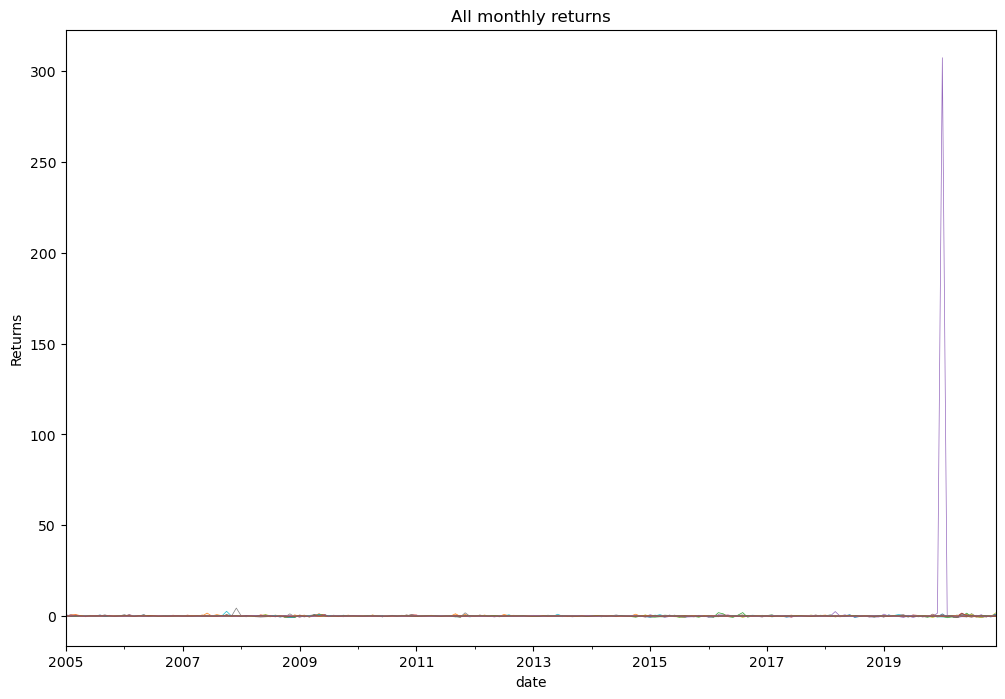

In [22]:
# Define the plot (plot all lines)

ax = nrg_returns.plot(linewidth=0.5, figsize=(12, 8))
ax.get_legend().remove()  # Removing the legend
ax.set_title('All monthly returns')  # Title
ax.set_ylabel('Returns')  # y-axis label


Here we can see that we have (some) huge outliers distorting the plot. Let's create a treshold of 1000%.


In [23]:
outlier_threshold = 10
outlier_companies = nrg_returns.loc[:, nrg_returns[(
    nrg_returns > outlier_threshold)].any(axis=0)]
outlier_list = outlier_companies.columns.values.tolist()
outlier_list


['IE00BLNN3691']

We have only one outlier, thats good. Let's remove it.


In [24]:
if outlier_list[0] in nrg_returns.columns.values.tolist():
    nrg_returns = nrg_returns.drop(columns=outlier_list)

nrg_returns


,AN8068571086,AU000000AOE6,AU000000ERA9,AU000000ORG5,AU000000PDN8,AU000000WHC8,AU000000WOR2,BE0003816338,BMG2108M2182,BMG5320C1082,...,US8454671095,US8475601097,US86764P1093,RU000A0B6NK6,US9026531049,US91913Y1001,US9694571004,US98385X1063,ARP9897X1319,ZAE000006896
date,,,,,,,,,,,,,,,,,,,,,
2005-01-31,0.012603,-0.087586,0.032408,0.001413,-0.058855,NaN,0.053326,-0.221404,-0.000471,-0.016535,...,-0.106096,NaN,-0.031204,NaN,0.047824,-0.035393,-0.046450,-0.060108,0.028704,0.088215
2005-02-28,0.063502,-0.006316,0.509758,0.008180,0.818187,NaN,0.037500,0.031757,-0.012241,-0.068279,...,0.150111,NaN,0.161942,NaN,-0.069058,0.322805,0.092083,0.108183,0.094693,-0.087507
2005-03-31,0.093039,0.131431,0.188845,0.023138,0.373450,NaN,0.130329,0.230611,0.163489,0.122907,...,0.057778,NaN,0.080660,NaN,-0.008869,0.196423,0.077830,0.183483,0.258207,0.231228
2005-04-30,-0.038401,-0.053780,-0.130408,0.031135,-0.114356,NaN,0.049456,0.038771,0.140516,0.000000,...,0.040317,NaN,0.107051,NaN,-0.067113,0.142520,0.045476,0.067322,-0.103228,0.002223
2005-05-31,-0.027085,-0.122518,-0.048968,-0.014060,-0.006077,NaN,0.004279,0.031982,0.000359,-0.062137,...,0.123802,NaN,-0.066758,NaN,0.083772,-0.118698,-0.084998,-0.109858,-0.011597,-0.042448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-31,0.056431,0.025929,0.059829,-0.030567,0.221436,-0.051895,-0.087717,0.192621,0.001988,0.292894,...,0.079365,0.0,0.000000,-0.040000,-0.087904,-0.027463,0.048380,0.000000,0.286645,0.082327
2020-09-30,0.001871,0.038956,0.102151,0.026130,0.412873,-0.301476,0.253637,-0.037486,-0.034939,-0.132470,...,-0.022058,0.0,0.000000,-0.020833,-0.014810,-0.026711,0.062879,0.000000,-0.143275,0.036017
2020-10-31,-0.194313,-0.026587,-0.112195,-0.210594,-0.255603,0.193846,-0.000491,-0.039670,-0.147194,-0.097708,...,-0.146617,0.0,0.000000,-0.021277,-0.023121,-0.232324,-0.086246,0.000000,-0.258657,-0.096972


Now we can create a new plot without the outlier.


Text(0, 0.5, 'Returns')

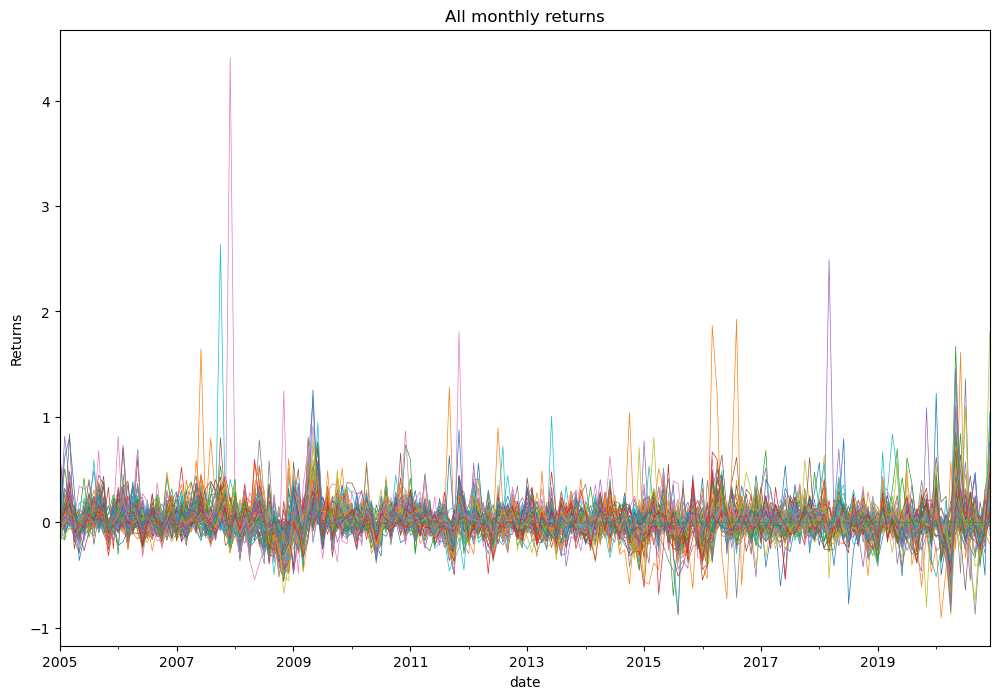

In [25]:
# Define the plot (plot all lines)

ax = nrg_returns.plot(linewidth=0.5, figsize=(12, 8))
ax.get_legend().remove()  # removing the legend
ax.set_title('All monthly returns')  # Title
ax.set_ylabel('Returns')  # y-axis label


This plot looks much better.


Now we want to export the new dataframe to a csv file.


In [26]:
# To get the current working directory
directory = os.getcwd()

# Defining subfolder path
path = directory+'/Clean_Data'

# Checking whether the specified path already exists - will avoid errors when re-running
if os.path.isdir(path):
    print(f'Path {path} already exists')
    pass

# If not, create subfolder
else:
    os.mkdir('Clean_Data')

# Saving the clean merged dataframe as a csv in a subfolder
nrg_returns.to_csv('Clean_Data/nrg_returns.csv')
# files.download('nrg_returns.csv')


Path /Users/pcw/Documents/SMT Master/EPFL/Finance/Clean_Data already exists


#### Getting Market Caps


Taking a closer look at the Market Cap data.


In [27]:
df_caps


,date,AEA000201011,AEA001501013,AEA002001013,AED000201015,AED000601016,AED000901010,AED001301012,AED001501017,AEDFXA0M6V00,...,ZAE000216537,ZAE000221370,ZAE000248498,ZAE000248506,ZAE000255360,ZAE000255915,ZAE000259479,ZAE000259701,ZAE000265971,ZAE000269890
0,2007-01-31,6534700000,758897000.0,1859940000,6350640000,2305090000,NaN,NaN,NaN,NaN,...,NaN,2.072570e+09,NaN,NaN,18552700000,12380100000,NaN,NaN,NaN,1.237120e+09
1,2007-02-28,6611120000,751838000.0,2235750000,6503290000,2391120000,NaN,NaN,NaN,NaN,...,NaN,1.966200e+09,NaN,NaN,19039600000,12764800000,NaN,NaN,NaN,1.233470e+09
2,2007-03-31,5980720000,838744000.0,1940260000,5319980000,2506660000,NaN,NaN,NaN,NaN,...,NaN,2.143880e+09,NaN,NaN,16878100000,12948100000,NaN,NaN,NaN,1.202500e+09
3,2007-04-30,6534350000,714754000.0,2329490000,6060680000,2630020000,NaN,NaN,NaN,NaN,...,NaN,2.478330e+09,NaN,NaN,18710200000,13936100000,NaN,NaN,NaN,1.401440e+09
4,2007-05-31,7647060000,923382000.0,3405840000,8077450000,2808010000,NaN,NaN,NaN,NaN,...,NaN,2.277380e+09,NaN,NaN,17881000000,12799400000,NaN,NaN,NaN,1.362000e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,2020-08-31,10494400000,NaN,4345770000,8082950000,1412400000,1.888480e+09,1.447930e+09,261378000.0,1.347090e+10,...,5.543370e+09,NaN,1.007220e+09,1.007220e+09,3111030000,3866810000,2.096430e+09,NaN,2.531580e+09,1.340430e+09
164,2020-09-30,10702800000,NaN,4302950000,8516670000,1331360000,1.825310e+09,1.517110e+09,291872000.0,1.347090e+10,...,5.176610e+09,NaN,1.027260e+09,1.027260e+09,2915080000,4525010000,2.436750e+09,NaN,2.561640e+09,1.387060e+09
165,2020-10-31,11119500000,NaN,5865720000,8201230000,1319780000,1.823130e+09,1.795500e+09,250487000.0,1.347090e+10,...,4.598340e+09,NaN,1.037060e+09,1.037060e+09,2718960000,4536810000,2.692790e+09,NaN,3.649600e+09,1.198440e+09
166,2020-11-30,11517300000,NaN,6507950000,8832100000,1447130000,1.901550e+09,1.943750e+09,250487000.0,1.347090e+10,...,6.058280e+09,NaN,1.178770e+09,1.178770e+09,3558920000,6040410000,3.266010e+09,NaN,3.722370e+09,1.528570e+09


Extracting the intersection between the energy companies that are in the the returns dataset (`returns_isin`) and the market caps (`df_caps`).


In [28]:
returns_isin = nrg_returns.columns.values.tolist()
nrg_caps = df_caps[df_returns.columns.intersection(returns_isin)]
nrg_caps


,AN8068571086,AU000000AOE6,AU000000ERA9,AU000000ORG5,AU000000PDN8,AU000000WHC8,AU000000WOR2,BE0003816338,BMG2108M2182,BMG5320C1082,...,US8454671095,US8475601097,US86764P1093,RU000A0B6NK6,US9026531049,US91913Y1001,US9694571004,US98385X1063,ARP9897X1319,ZAE000006896
0,74825700000,5.135480e+08,3079170000,6.037320e+09,3.372720e+09,NaN,3.423190e+09,1555140000,3010950000,2.424230e+09,...,6471650000,1.646810e+10,7.660140e+09,NaN,4416550000,32791300000,16095200000,1.846830e+10,18410400000,2.134640e+10
1,74012500000,5.645100e+08,3678900000,6.068140e+09,3.591960e+09,NaN,4.794950e+09,1587330000,3043510000,2.304480e+09,...,6610540000,1.622220e+10,7.819090e+09,NaN,4562190000,34760700000,16124300000,1.899390e+10,17123300000,2.019070e+10
2,81437400000,7.861750e+08,4286560000,6.333870e+09,3.940580e+09,NaN,5.134680e+09,1766810000,3141950000,2.416050e+09,...,6929820000,1.658860e+10,8.547130e+09,NaN,4287570000,38959300000,17015200000,2.016770e+10,16507100000,2.090860e+10
3,87013400000,8.771610e+08,3995060000,6.589470e+09,4.171120e+09,NaN,5.220020e+09,1770770000,3144040000,2.155100e+09,...,7135780000,1.648120e+10,9.173000e+09,NaN,4208900000,38555600000,17666300000,1.999130e+10,16494200000,2.173170e+10
4,91774800000,1.210180e+09,3620750000,6.334960e+09,4.341900e+09,NaN,5.632360e+09,1949750000,3636350000,2.562450e+09,...,8087210000,1.682560e+10,9.680650e+09,NaN,4125110000,40965700000,19019700000,2.137570e+10,16691800000,2.271890e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,26387800000,NaN,476420000,7.273810e+09,2.467690e+08,7.037400e+08,3.692620e+09,2007750000,1243010000,NaN,...,1683270000,NaN,NaN,818854000.0,10271300000,21444000000,25193500000,NaN,3844310000,5.154680e+09
164,21660000000,NaN,396511000,5.423190e+09,1.815220e+08,7.678170e+08,3.559380e+09,1947860000,1041240000,NaN,...,1423030000,NaN,NaN,811556000.0,9602990000,17664000000,23846400000,NaN,2667690000,4.877320e+09
165,20796900000,NaN,389036000,4.949720e+09,1.852240e+08,7.726980e+08,3.452640e+09,1605490000,959765000,NaN,...,1616840000,NaN,NaN,729863000.0,9199600000,15744700000,23288700000,NaN,2562820000,3.275830e+09
166,28940300000,NaN,420255000,6.700900e+09,2.234230e+08,1.004980e+09,4.946650e+09,1730840000,969609000,NaN,...,2092300000,NaN,NaN,932591000.0,11328700000,21926800000,25461000000,NaN,3702360000,4.933380e+09


We will for this dataset also set the `date` column as the index.


In [29]:
if 'date' in nrg_caps.columns.values.tolist():  # date as index
    nrg_caps.set_index('date', inplace=True)

nrg_returns.isnull().sum().sum()  # Count NANs


526

Now we are ready to start answering the questions.


### Q1 - Annual average return and annualized volatility for all individual assets over the period 2005-2020. Correlation between individual average returns and volatility individually and between both metrics.


We will loop through the columns representing energy returns (`nrg_returns`). Using method `.std()` to get standard deviation.


In [30]:
df_q1 = pd.DataFrame([])

for a in nrg_returns.columns.values.tolist():

    # Get annualized average return
    avg_monthly = nrg_returns[a].mean()
    annualized_avg_return = avg_monthly*months

    # Get annualized volatility
    std_monthly = nrg_returns[a].std()
    annualized_volatility = std_monthly*math.sqrt(months)

    # Create series
    asset = {'AAR': annualized_avg_return, 'volatility': annualized_volatility}
    series = pd.Series(data=asset, index=['AAR', 'volatility'])

    # Concat
    df_q1 = pd.concat([df_q1, series.rename(a)], axis=1)

# Transpose df for readability
df_q1 = df_q1.T

# Show
display(df_q1.head())
display(df_q1.shape)


,AAR,volatility
AN8068571086,0.070937,0.372584
AU000000AOE6,0.233029,0.423224
AU000000ERA9,-0.016714,0.561325
AU000000ORG5,0.087845,0.368280
AU000000PDN8,0.277071,0.972955


(185, 2)

Let's have a look a the descriptive statistics of the newly created dataset and plot the variance and annualized average returns.


,AAR,volatility
count,185.000000,185.000000
mean,0.114505,0.440064
std,0.103810,0.155904
min,-0.244423,0.155693
25%,0.067506,0.347150
50%,0.111135,0.420355
75%,0.167964,0.508374
max,0.452643,1.243948


/Users/pcw/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Text(0.5, 1.0, 'Annualized average Return for each Energy Company')

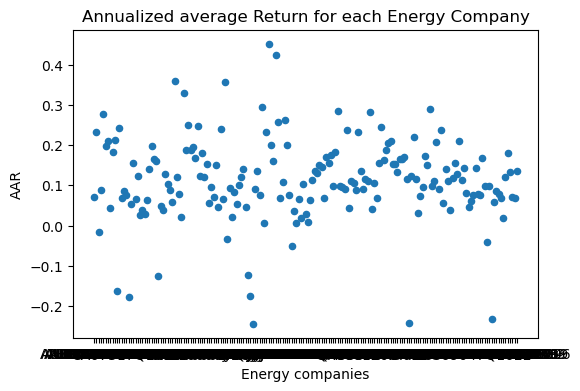

In [31]:
display(df_q1.describe())
df_q1_plot = df_q1.copy()
df_q1_plot
ax = df_q1.reset_index().plot(kind='scatter', x='index',  y='AAR', figsize=(6, 4))
ax.set_xlabel('Energy companies')
ax.set_title('Annualized average Return for each Energy Company')  # Title

In [32]:
df_q1.corr()

,AAR,volatility
AAR,1.000000,0.106325
volatility,0.106325,1.000000


,AAR,volatility
count,185.000000,185.000000
mean,0.114505,0.440064
std,0.103810,0.155904
min,-0.244423,0.155693
25%,0.067506,0.347150
50%,0.111135,0.420355
75%,0.167964,0.508374
max,0.452643,1.243948


/Users/pcw/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Text(0.5, 1.0, 'Annualized average Return for each Energy Company')

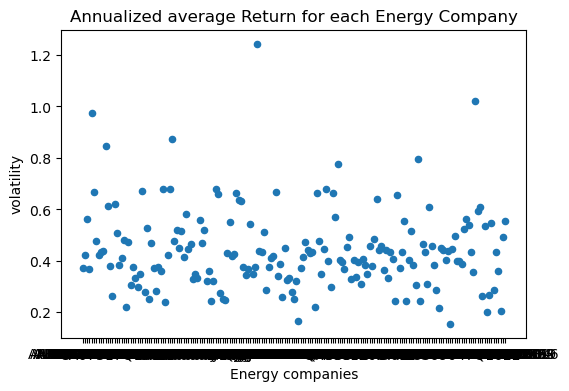

In [33]:
display(df_q1.describe())
df_q1_plot = df_q1.copy()
df_q1_plot
ax = df_q1.reset_index().plot(kind='scatter', x='index',  y='volatility', figsize=(6, 4))
ax.set_xlabel('Energy companies')
ax.set_title('Annualized average Return for each Energy Company')  # Title

Lets make a plot with the correlation as well.

In [34]:
# correlation between individual average returns and volatility
corr_arr_vol_q1 = df_q1['AAR'].corr(df_q1['volatility'])
corr_arr_vol_q1

0.10632461758462786

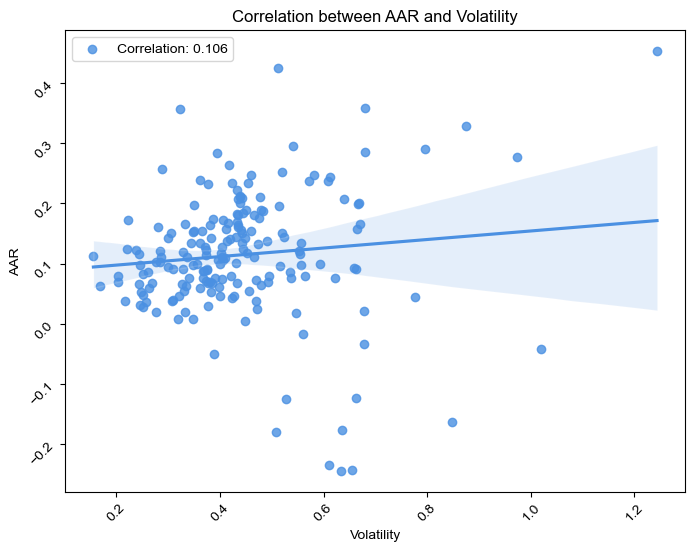

In [35]:
# Set the figure size
plt.figure(figsize=(8, 6))

# Use the function regplot to make a scatterplot
sns.regplot(x=df_q1['volatility'], y=df_q1['AAR'], color='#4A90E2', seed=0)

# Add a title and axis labels
plt.title('Correlation between AAR and Volatility')
plt.xlabel('Volatility')
plt.ylabel('AAR')

# Customize the tick marks
plt.xticks(rotation=45)
plt.yticks(rotation=45)

plt.legend(labels=[f'Correlation: {round(corr_arr_vol_q1, 3)}'])

# Change the background color
sns.set_style("whitegrid")

plt.show()

Let's check if our data is correct by manually calculating the AAR and volatility for the company with ISIN: `AU000000ERA9`.


In [36]:
nrg_returns['AU000000ERA9'].describe()


count    192.000000
mean      -0.001393
std        0.162041
min       -0.697007
25%       -0.087002
50%       -0.016616
75%        0.073296
max        0.681818
Name: AU000000ERA9, dtype: float64

In [37]:
# Verify that this is correct by manually doing the same for the 2nd asset

# AAR
check_aar = nrg_returns['AU000000ERA9'].mean()
check_aar_annualized = check_aar*months

# Volatility
check_std = nrg_returns['AU000000ERA9'].std()
check_std_annualized = check_std*math.sqrt(months)

rounds = 50

display(round(check_aar_annualized, rounds) == round(df_q1.iloc[2][0], rounds))
display(round(check_std_annualized, rounds) == round(df_q1.iloc[2][1], rounds))


True

True

We can see that the values are equal even with 50 decimals.


### Q.2 - Equally-weighted and value-weighted portfolio with monthly rebalancing over the period 2005-2020. Report the following statistics for both portfolios: annualized average return, annualized volatility, minimum return, maximum return, and Sharpe ratio. Plot the time series of return for both portfolios


#### Q.II.I Building dataset


In [38]:
risk_free_rate = 0.05

In [39]:
# Building melted df with market caps

df_q2 = nrg_returns_date_column.drop(columns=['IE00BLNN3691']).copy()
df_q2 = df_q2.melt(id_vars=['date'], var_name='ISIN',
                   value_name='monthly_return')

df_q2['date'] = pd.to_datetime(df_q2['date'], infer_datetime_format=True)
df_q2['year'] = df_q2.date.dt.year
df_q2['month'] = df_q2.date.dt.month
df_q2 = df_q2[['date', 'year', 'month', 'ISIN', 'monthly_return']].copy()

df_size = df_caps.melt(
    id_vars=['date'], var_name='ISIN', value_name='market_cap')
df_q2 = pd.merge(df_q2, df_size, how='left', on=('date', 'ISIN'))

df_q2


,date,year,month,ISIN,monthly_return,market_cap
0,2005-01-31,2005,1,AN8068571086,0.012603,NaN
1,2005-02-28,2005,2,AN8068571086,0.063502,NaN
2,2005-03-31,2005,3,AN8068571086,0.093039,NaN
3,2005-04-30,2005,4,AN8068571086,-0.038401,NaN
4,2005-05-31,2005,5,AN8068571086,-0.027085,NaN
...,...,...,...,...,...,...
35515,2020-08-31,2020,8,ZAE000006896,0.082327,5.154680e+09
35516,2020-09-30,2020,9,ZAE000006896,0.036017,4.877320e+09
35517,2020-10-31,2020,10,ZAE000006896,-0.096972,3.275830e+09
35518,2020-11-30,2020,11,ZAE000006896,-0.291075,4.933380e+09


In [40]:
# Annual return (sum of monthly returns per year per ISIN)
an_rtrn = df_q2[['year', 'ISIN', 'monthly_return']
                ].groupby(['year', 'ISIN']).sum().copy()


def annual_return(row):
    ISIN = row['ISIN']
    year = row['year']
    return an_rtrn.loc[(year, ISIN)][0]


df_q2['annual_returns'] = df_q2.apply(annual_return, axis=1)
df_q2


,date,year,month,ISIN,monthly_return,market_cap,annual_returns
0,2005-01-31,2005,1,AN8068571086,0.012603,NaN,0.468026
1,2005-02-28,2005,2,AN8068571086,0.063502,NaN,0.468026
2,2005-03-31,2005,3,AN8068571086,0.093039,NaN,0.468026
3,2005-04-30,2005,4,AN8068571086,-0.038401,NaN,0.468026
4,2005-05-31,2005,5,AN8068571086,-0.027085,NaN,0.468026
...,...,...,...,...,...,...,...
35515,2020-08-31,2020,8,ZAE000006896,0.082327,5.154680e+09,1.030514
35516,2020-09-30,2020,9,ZAE000006896,0.036017,4.877320e+09,1.030514
35517,2020-10-31,2020,10,ZAE000006896,-0.096972,3.275830e+09,1.030514
35518,2020-11-30,2020,11,ZAE000006896,-0.291075,4.933380e+09,1.030514


#### Q.II.II Building the Equally Weighted Portfolio


In [41]:
# Building equally weighted portfolio with monthly rebalancing
df_q2_e = df_q2.copy()

num_assets = len(df_q2_e.columns.values.tolist())
equal_weight = 1 / num_assets
df_q2_e.head(2)


,date,year,month,ISIN,monthly_return,market_cap,annual_returns
0,2005-01-31,2005,1,AN8068571086,0.012603,NaN,0.468026
1,2005-02-28,2005,2,AN8068571086,0.063502,NaN,0.468026


In [115]:

df_q2_e['ew_AAR'] = df_q1.AAR.mean()


df_q2_e['ew_annualized_volatility'] = df_q2_e.monthly_return.std() * \
    math.sqrt(months)

# Computing the annual return of the equally-weighted portolio
eq_weight_port_df = df_q2_e[['year', 'annual_returns']].groupby('year').mean()


def eq_weight_port_func(row):
    year = row['year']
    return eq_weight_port_df.loc[year][0]


df_q2_e['ew_annual_return'] = df_q2_e.apply(eq_weight_port_func, axis=1)

# Computing the monthly return of the value-weighted portfolio
ew_monthly_return_df = df_q2_e[['year', 'month', 'monthly_return']].groupby([
                                                                            'year', 'month']).sum()

def ew_monthly_return_func(row):
    year = row['year']
    month = row['month']
    return ew_monthly_return_df.loc[(year, month)][0]


df_q2_e['ew_monthly_return'] = df_q2_e.apply(ew_monthly_return_func, axis=1)

# Computing portfolio statistics
ew_min = df_q2_e['ew_annual_return'].min()
ew_max = df_q2_e['ew_annual_return'].max()
ew_sharperatio = (df_q2_e['ew_AAR'].mean() - risk_free_rate) / \
    df_q2_e['ew_annualized_volatility'].mean()
# Showing dataframe
df_q2_e[190:196]


,date,year,month,ISIN,monthly_return,market_cap,annual_returns,ew_AAR,ew_annualized_volatility,ew_annual_return,ew_monthly_return
190,2020-11-30,2020,11,AN8068571086,0.037976,2.894030e+10,-0.099189,0.114505,0.466141,0.046559,-1.584512
191,2020-12-31,2020,12,AN8068571086,0.360397,3.039450e+10,-0.099189,0.114505,0.466141,0.046559,44.347042
192,2005-01-31,2005,1,AU000000AOE6,-0.087586,NaN,0.726672,0.114505,0.466141,0.404962,2.173506
193,2005-02-28,2005,2,AU000000AOE6,-0.006316,NaN,0.726672,0.114505,0.466141,0.404962,9.533271
194,2005-03-31,2005,3,AU000000AOE6,0.131431,NaN,0.726672,0.114505,0.466141,0.404962,18.887986
195,2005-04-30,2005,4,AU000000AOE6,-0.053780,NaN,0.726672,0.114505,0.466141,0.404962,0.080955


In [43]:
ew_AAR = df_q2_e['ew_AAR'].mean()
ew_volatility = df_q2_e['ew_annualized_volatility'].mean()

print(f'Equally-weighted portfolio statistics:\n\nAAR: {ew_AAR}')
print(f'Max yearly return: {ew_max}')
print(f'Min yearly return: {ew_min}')
print(f'Sharpe ratio: {ew_sharperatio}')
print(f'Annualized volatility: {ew_volatility}')


Equally-weighted portfolio statistics:

AAR: 0.11450456815373546
Max yearly return: 0.7621268239197497
Min yearly return: -0.6012519031706335
Sharpe ratio: 0.13837994428094735
Annualized volatility: 0.4661410184034644


#### Q.II.III Building Value-weighted Portfolio


In [44]:
# Building value weighted portfolio with monthly rebalancing
df_q2_v = df_q2.copy()
df_q2_v.head()


,date,year,month,ISIN,monthly_return,market_cap,annual_returns
0,2005-01-31,2005,1,AN8068571086,0.012603,NaN,0.468026
1,2005-02-28,2005,2,AN8068571086,0.063502,NaN,0.468026
2,2005-03-31,2005,3,AN8068571086,0.093039,NaN,0.468026
3,2005-04-30,2005,4,AN8068571086,-0.038401,NaN,0.468026
4,2005-05-31,2005,5,AN8068571086,-0.027085,NaN,0.468026


In [45]:
# get monthly total market value
val_weight_df = df_q2_v[['year', 'month', 'market_cap']
                        ].groupby(['year', 'month']).sum().copy()

# function to get value-based weights
def val_weight_func(row):
    year = row['year']
    month = row['month']
    return row['market_cap']/val_weight_df.loc[(year, month)][0]


In [46]:
df_q2_v['value_weight'] = df_q2_v.apply(val_weight_func, axis=1)
df_q2_v

,date,year,month,ISIN,monthly_return,market_cap,annual_returns,value_weight
0,2005-01-31,2005,1,AN8068571086,0.012603,NaN,0.468026,NaN
1,2005-02-28,2005,2,AN8068571086,0.063502,NaN,0.468026,NaN
2,2005-03-31,2005,3,AN8068571086,0.093039,NaN,0.468026,NaN
3,2005-04-30,2005,4,AN8068571086,-0.038401,NaN,0.468026,NaN
4,2005-05-31,2005,5,AN8068571086,-0.027085,NaN,0.468026,NaN
...,...,...,...,...,...,...,...,...
35515,2020-08-31,2020,8,ZAE000006896,0.082327,5.154680e+09,1.030514,0.002621
35516,2020-09-30,2020,9,ZAE000006896,0.036017,4.877320e+09,1.030514,0.002824
35517,2020-10-31,2020,10,ZAE000006896,-0.096972,3.275830e+09,1.030514,0.001902
35518,2020-11-30,2020,11,ZAE000006896,-0.291075,4.933380e+09,1.030514,0.002382


In [47]:
# Computing the monthly returns for each ISIN based on the market cap weight per month
df_q2_v['vw_asset_monthly_weighted_returns'] = df_q2_v['monthly_return'] * \
    df_q2_v['value_weight']

# Computing the AAR of the value-weighted portfolio by summing all the monthly weighted returns across the portfolio and dividing by 16 years of data
df_q2_v['vw_AAR'] = (df_q2_v['vw_asset_monthly_weighted_returns'].sum())/16

# Computing the annual returns of the value-weighted portfolio
vw_annual_return_df = df_q2_v[[
    'year', 'vw_asset_monthly_weighted_returns']].groupby('year').sum()


def vw_annual_return_func(row):
    year = row['year']
    return vw_annual_return_df.loc[(year)][0]


df_q2_v['vw_annual_return'] = df_q2_v.apply(vw_annual_return_func, axis=1)

# Computing the monthly return of the value-weighted portfolio
vw_monthly_return_df = df_q2_v[['year', 'month', 'vw_asset_monthly_weighted_returns']].groupby([
                                                                                               'year', 'month']).sum()


def vw_monthly_return_func(row):
    year = row['year']
    month = row['month']
    return vw_monthly_return_df.loc[(year, month)][0]


df_q2_v['vw_monthly_return'] = df_q2_v.apply(vw_monthly_return_func, axis=1)

# Computing portfolio statistics
df_q2_v['vw_annualized_volatility'] = df_q2_v['vw_monthly_return'].std() * \
    math.sqrt(months)
vw_min = df_q2_v['vw_annual_return'].min()
vw_max = df_q2_v['vw_annual_return'].max()
vw_sharperatio = (df_q2_v['vw_annual_return'].mean(
) - risk_free_rate)/df_q2_v['vw_annualized_volatility'].mean()
# Showing dataframe
df_q2_v


,date,year,month,ISIN,monthly_return,market_cap,annual_returns,value_weight,vw_asset_monthly_weighted_returns,vw_AAR,vw_annual_return,vw_monthly_return,vw_annualized_volatility
0,2005-01-31,2005,1,AN8068571086,0.012603,NaN,0.468026,NaN,NaN,0.06779,0.000000,0.000000,0.226115
1,2005-02-28,2005,2,AN8068571086,0.063502,NaN,0.468026,NaN,NaN,0.06779,0.000000,0.000000,0.226115
2,2005-03-31,2005,3,AN8068571086,0.093039,NaN,0.468026,NaN,NaN,0.06779,0.000000,0.000000,0.226115
3,2005-04-30,2005,4,AN8068571086,-0.038401,NaN,0.468026,NaN,NaN,0.06779,0.000000,0.000000,0.226115
4,2005-05-31,2005,5,AN8068571086,-0.027085,NaN,0.468026,NaN,NaN,0.06779,0.000000,0.000000,0.226115
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35515,2020-08-31,2020,8,ZAE000006896,0.082327,5.154680e+09,1.030514,0.002621,0.000216,0.06779,-0.074265,-0.003596,0.226115
35516,2020-09-30,2020,9,ZAE000006896,0.036017,4.877320e+09,1.030514,0.002824,0.000102,0.06779,-0.074265,0.017528,0.226115
35517,2020-10-31,2020,10,ZAE000006896,-0.096972,3.275830e+09,1.030514,0.001902,-0.000184,0.06779,-0.074265,-0.108465,0.226115
35518,2020-11-30,2020,11,ZAE000006896,-0.291075,4.933380e+09,1.030514,0.002382,-0.000693,0.06779,-0.074265,-0.014693,0.226115


In [48]:
vw_AAR = df_q2_v['vw_AAR'].mean()
vw_volatility = df_q2_v['vw_annualized_volatility'].mean()

print(f'Value-weighted portfolio statistics:\n\nAAR: {vw_AAR}')
print(f'Max yearly return: {vw_max}')
print(f'Min yearly return: {vw_min}')
print(f'Sharpe ratio: {vw_sharperatio}')
print(f'Annualized volatility: {vw_volatility}')


Value-weighted portfolio statistics:

AAR: 0.06779019808546093
Max yearly return: 0.5026170333602856
Min yearly return: -0.45433048217973254
Sharpe ratio: 0.07867757080533871
Annualized volatility: 0.22611524356148152


In [110]:
df_q2_v.isna().sum()

date                                    0
year                                    0
month                                   0
ISIN                                    0
monthly_return                        526
market_cap                           8409
annual_returns                          0
value_weight                         8409
vw_asset_monthly_weighted_returns    8425
vw_AAR                                  0
vw_annual_return                        0
vw_monthly_return                       0
vw_annualized_volatility                0
dtype: int64

#### Q.II.IV Compare the two portfolios


In [49]:
# Generate sample data
x = df_q2.groupby('year').year.mean()
y1 = df_q2_v.groupby('year').vw_annual_return.mean()
y3 = df_q2_e.groupby('year').ew_annual_return.mean()

# Create figure
fig = go.Figure()

# Add time series traces
fig.add_trace(go.Scatter(x=x, y=y1, name='Value-weighted portfolio annual returns',
              line=dict(color='lightblue', width=5)))
fig.add_trace(go.Scatter(x=x, y=y3, name='Equally-weighted portfolio annual returns',
              line=dict(color='darkgreen', width=5)))

# Update layout
fig.update_layout(title='Portfolio Performance by Year',
                  xaxis_title='Year',
                  yaxis_title='Annual Return',
                  legend_title='Portfolio Type',
                  font=dict(size=16),
                  plot_bgcolor='white')

# Center legend title
fig.update_layout(legend=dict(title=dict(text='Portfolio Type', font=dict(size=18), side='top')),
                  legend_title_font=dict(size=18),
                  legend_title_side='top')

# Center plot title
fig.update_layout(title=dict(text='Portfolio Performance by Year',
                  font=dict(size=22), x=0.4, xanchor='center'))


# Customize axes
fig.update_xaxes(tickvals=x,
                 ticktext=[str(int(val)) for val in x],
                 tickangle=45,
                 dtick=1,
                 tickfont=dict(size=14),
                 gridcolor='lightgray',
                 zeroline=False)

fig.update_yaxes(tickfont=dict(size=14),
                 gridcolor='lightgray',
                 zeroline=False)

fig.show()


In [50]:
## TODO: REMOVE THIS CODE
display(df_q2_v)
#display(df_q2_e.count())

,date,year,month,ISIN,monthly_return,market_cap,annual_returns,value_weight,vw_asset_monthly_weighted_returns,vw_AAR,vw_annual_return,vw_monthly_return,vw_annualized_volatility
0,2005-01-31,2005,1,AN8068571086,0.012603,NaN,0.468026,NaN,NaN,0.06779,0.000000,0.000000,0.226115
1,2005-02-28,2005,2,AN8068571086,0.063502,NaN,0.468026,NaN,NaN,0.06779,0.000000,0.000000,0.226115
2,2005-03-31,2005,3,AN8068571086,0.093039,NaN,0.468026,NaN,NaN,0.06779,0.000000,0.000000,0.226115
3,2005-04-30,2005,4,AN8068571086,-0.038401,NaN,0.468026,NaN,NaN,0.06779,0.000000,0.000000,0.226115
4,2005-05-31,2005,5,AN8068571086,-0.027085,NaN,0.468026,NaN,NaN,0.06779,0.000000,0.000000,0.226115
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35515,2020-08-31,2020,8,ZAE000006896,0.082327,5.154680e+09,1.030514,0.002621,0.000216,0.06779,-0.074265,-0.003596,0.226115
35516,2020-09-30,2020,9,ZAE000006896,0.036017,4.877320e+09,1.030514,0.002824,0.000102,0.06779,-0.074265,0.017528,0.226115
35517,2020-10-31,2020,10,ZAE000006896,-0.096972,3.275830e+09,1.030514,0.001902,-0.000184,0.06779,-0.074265,-0.108465,0.226115
35518,2020-11-30,2020,11,ZAE000006896,-0.291075,4.933380e+09,1.030514,0.002382,-0.000693,0.06779,-0.074265,-0.014693,0.226115


Note: Really high numbers in 2009. See https://www.naturalgasintel.com/2009-called-terrific-year-for-energy-investors-2/


In [51]:
# Create a new table
table = prettytable.PrettyTable()

# Add the columns to the table
table.field_names = ['Portfolio',
                     'Value-weighted portfolio', 'Equally-weighted portfolio']

# Add the rows to the table
tabledf = {
    'Annualized average return': ['Annualized average return', round(vw_AAR, 4), round(ew_AAR, 4)],
    'Annualized Volatility': ['Annualized volatility', round(vw_volatility, 4), round(ew_volatility, 4)],
    'Minimum return': ['Minimum return', round(vw_min, 4), round(ew_min, 4)],
    'Maximum return': ['Maximum return', round(vw_max, 4), round(ew_max, 4)],
    'Sharpe Ratio': ['Sharpe Ratio', round(vw_sharperatio, 4), round(ew_sharperatio, 4)]
}

for row in tabledf:
    table.add_row(tabledf[row])

# Add borders to the table
table.hrules = prettytable.ALL
table.header = True
table.set_style(prettytable.SINGLE_BORDER)

# Save the table to a file
with open('value&equal.txt', 'w') as f:
    f.write(str(table))

# Display the table
print(table)

table


┌───────────────────────────┬──────────────────────────┬────────────────────────────┐
│         Portfolio         │ Value-weighted portfolio │ Equally-weighted portfolio │
├───────────────────────────┼──────────────────────────┼────────────────────────────┤
│ Annualized average return │          0.0678          │           0.1145           │
├───────────────────────────┼──────────────────────────┼────────────────────────────┤
│   Annualized volatility   │          0.2261          │           0.4661           │
├───────────────────────────┼──────────────────────────┼────────────────────────────┤
│       Minimum return      │         -0.4543          │          -0.6013           │
├───────────────────────────┼──────────────────────────┼────────────────────────────┤
│       Maximum return      │          0.5026          │           0.7621           │
├───────────────────────────┼──────────────────────────┼────────────────────────────┤
│        Sharpe Ratio       │          0.0787         

Portfolio,Value-weighted portfolio,Equally-weighted portfolio
Annualized average return,0.0678,0.1145
Annualized volatility,0.2261,0.4661
Minimum return,-0.4543,-0.6013
Maximum return,0.5026,0.7621
Sharpe Ratio,0.0787,0.1384


### Q.3 - For this question, limit your set of firms to 100 randomly selected firms. Pay a particular attention to the construction of the covariance matrix. Build an optimal portfolio with minimum variance with monthly rebalancing over the period 2005-2020. Report the following statistics: annualized average return, annualized volatility, minimum return, maximum return, and Sharpe ratio. Comment on the reported statistics in comparison with the equally-weighted and value-weighted portfolio


Let's remind ourselves on how the `nrg_returns_date_column` data looks like.

In [52]:
nrg_returns_date_column.head()

,date,AN8068571086,AU000000AOE6,AU000000ERA9,AU000000ORG5,AU000000PDN8,AU000000WHC8,AU000000WOR2,BE0003816338,BMG2108M2182,...,US8454671095,US8475601097,US86764P1093,RU000A0B6NK6,US9026531049,US91913Y1001,US9694571004,US98385X1063,ARP9897X1319,ZAE000006896
36,2005-01-31,0.012603,-0.087586,0.032408,0.001413,-0.058855,NaN,0.053326,-0.221404,-0.000471,...,-0.106096,NaN,-0.031204,NaN,0.047824,-0.035393,-0.046450,-0.060108,0.028704,0.088215
37,2005-02-28,0.063502,-0.006316,0.509758,0.008180,0.818187,NaN,0.037500,0.031757,-0.012241,...,0.150111,NaN,0.161942,NaN,-0.069058,0.322805,0.092083,0.108183,0.094693,-0.087507
38,2005-03-31,0.093039,0.131431,0.188845,0.023138,0.373450,NaN,0.130329,0.230611,0.163489,...,0.057778,NaN,0.080660,NaN,-0.008869,0.196423,0.077830,0.183483,0.258207,0.231228
39,2005-04-30,-0.038401,-0.053780,-0.130408,0.031135,-0.114356,NaN,0.049456,0.038771,0.140516,...,0.040317,NaN,0.107051,NaN,-0.067113,0.142520,0.045476,0.067322,-0.103228,0.002223
40,2005-05-31,-0.027085,-0.122518,-0.048968,-0.014060,-0.006077,NaN,0.004279,0.031982,0.000359,...,0.123802,NaN,-0.066758,NaN,0.083772,-0.118698,-0.084998,-0.109858,-0.011597,-0.042448


We need to transfrom this data so we have a this format:


| date	| year | month |ISIN | monthly_return |
|---|---|---|---|---|
| 0	|2005-01-31	2005 | 1 | XXXXXXXXXX |	123 |
| 0	|2005-01-31	2005 | 1 | XXXXXXXXXX |	123 |
| 1	|2005-02-28	2005 |2 | XXXXXXXXXX  | 123|

In [53]:
df_q3 = nrg_returns_date_column.drop(columns=['IE00BLNN3691'])
df_q3 = df_q3.melt(id_vars =['date'], var_name='ISIN', value_name='monthly_return')


df_q3['date'] = pd.to_datetime(df_q3['date'], infer_datetime_format=True)
df_q3['year'] = df_q3.date.dt.year
df_q3['month'] = df_q3.date.dt.month
df_q3 = df_q3[['date','year','month','ISIN','monthly_return']].copy()

df_q3

,date,year,month,ISIN,monthly_return
0,2005-01-31,2005,1,AN8068571086,0.012603
1,2005-02-28,2005,2,AN8068571086,0.063502
2,2005-03-31,2005,3,AN8068571086,0.093039
3,2005-04-30,2005,4,AN8068571086,-0.038401
4,2005-05-31,2005,5,AN8068571086,-0.027085
...,...,...,...,...,...
35515,2020-08-31,2020,8,ZAE000006896,0.082327
35516,2020-09-30,2020,9,ZAE000006896,0.036017
35517,2020-10-31,2020,10,ZAE000006896,-0.096972
35518,2020-11-30,2020,11,ZAE000006896,-0.291075


Great! Now we melt the market cap into this dataframe as well.

In [54]:
df_size = df_caps.melt(id_vars =['date'], var_name='ISIN', value_name='market_cap')
df_size
df_q3 = pd.merge(df_q3, df_size, how='left', on=('date','ISIN'))
df_q3

,date,year,month,ISIN,monthly_return,market_cap
0,2005-01-31,2005,1,AN8068571086,0.012603,NaN
1,2005-02-28,2005,2,AN8068571086,0.063502,NaN
2,2005-03-31,2005,3,AN8068571086,0.093039,NaN
3,2005-04-30,2005,4,AN8068571086,-0.038401,NaN
4,2005-05-31,2005,5,AN8068571086,-0.027085,NaN
...,...,...,...,...,...,...
35515,2020-08-31,2020,8,ZAE000006896,0.082327,5.154680e+09
35516,2020-09-30,2020,9,ZAE000006896,0.036017,4.877320e+09
35517,2020-10-31,2020,10,ZAE000006896,-0.096972,3.275830e+09
35518,2020-11-30,2020,11,ZAE000006896,-0.291075,4.933380e+09


Let's check if the unqiue ISIN / number of companies is still 185.

In [55]:
unique_assets = df_q3.ISIN.unique()
display(len(unique_assets))
display(len(df_q3.ISIN) / len(unique_assets))

185

192.0

Now we can get control of the NaN values and get rid of these.

In [56]:
df_nona = nrg_returns[nrg_returns.columns[~nrg_returns.isnull().any()]]
print(df_nona.isnull().sum().sum())
nona_assets = df_nona.columns.values.tolist()
df_nona.head()

0


,AN8068571086,AU000000AOE6,AU000000ERA9,AU000000ORG5,AU000000PDN8,AU000000WOR2,BE0003816338,BMG2108M2182,BMG5320C1082,BRUGPAACNOR8,...,US78532P1075,US8321101003,US8454671095,US86764P1093,US9026531049,US91913Y1001,US9694571004,US98385X1063,ARP9897X1319,ZAE000006896
date,,,,,,,,,,,,,,,,,,,,,
2005-01-31,0.012603,-0.087586,0.032408,0.001413,-0.058855,0.053326,-0.221404,-0.000471,-0.016535,0.018039,...,-0.088156,-0.086143,-0.106096,-0.031204,0.047824,-0.035393,-0.046450,-0.060108,0.028704,0.088215
2005-02-28,0.063502,-0.006316,0.509758,0.008180,0.818187,0.037500,0.031757,-0.012241,-0.068279,0.022781,...,0.114714,0.138451,0.150111,0.161942,-0.069058,0.322805,0.092083,0.108183,0.094693,-0.087507
2005-03-31,0.093039,0.131431,0.188845,0.023138,0.373450,0.130329,0.230611,0.163489,0.122907,0.039161,...,0.167271,0.047169,0.057778,0.080660,-0.008869,0.196423,0.077830,0.183483,0.258207,0.231228
2005-04-30,-0.038401,-0.053780,-0.130408,0.031135,-0.114356,0.049456,0.038771,0.140516,0.000000,-0.018633,...,0.061425,0.015205,0.040317,0.107051,-0.067113,0.142520,0.045476,0.067322,-0.103228,0.002223
2005-05-31,-0.027085,-0.122518,-0.048968,-0.014060,-0.006077,0.004279,0.031982,0.000359,-0.062137,0.054247,...,-0.048808,-0.054704,0.123802,-0.066758,0.083772,-0.118698,-0.084998,-0.109858,-0.011597,-0.042448


In [57]:
# randomly select 100 firms
randfirms = random .sample(nona_assets, 100)

In [58]:
df_q3_100 = df_q3[df_q3.ISIN.isin(randfirms) == True]
df_q3_100.head()

,date,year,month,ISIN,monthly_return,market_cap
0,2005-01-31,2005,1,AN8068571086,0.012603,NaN
1,2005-02-28,2005,2,AN8068571086,0.063502,NaN
2,2005-03-31,2005,3,AN8068571086,0.093039,NaN
3,2005-04-30,2005,4,AN8068571086,-0.038401,NaN
4,2005-05-31,2005,5,AN8068571086,-0.027085,NaN


In [59]:
df_q3_100_sorted = df_q3_100.sort_values(by=['date','ISIN'], inplace = False) 
df_q3_100_sorted = df_q3_100_sorted.reset_index(drop=True)
df_q3_100_sorted

,date,year,month,ISIN,monthly_return,market_cap
0,2005-01-31,2005,1,AN8068571086,0.012603,NaN
1,2005-01-31,2005,1,ARP9897X1319,0.028704,NaN
2,2005-01-31,2005,1,AU000000AOE6,-0.087586,NaN
3,2005-01-31,2005,1,AU000000PDN8,-0.058855,NaN
4,2005-01-31,2005,1,AU000000WOR2,0.053326,NaN
...,...,...,...,...,...,...
19195,2020-12-31,2020,12,US9026531049,0.178104,1.131690e+10
19196,2020-12-31,2020,12,US91913Y1001,0.388083,2.306860e+10
19197,2020-12-31,2020,12,US9694571004,0.113479,2.433240e+10
19198,2020-12-31,2020,12,US98385X1063,0.000000,NaN


In [60]:
df_q3_ret = nrg_returns.drop(columns=[col for col in nrg_returns if col not in randfirms])

df_q3_ret = nrg_returns.drop(columns=[col for col in nrg_returns if col not in randfirms])
df_q3_ret = df_q3_ret[df_q3_100_sorted.ISIN.unique().tolist()]

df_q3_ret

,AN8068571086,ARP9897X1319,AU000000AOE6,AU000000PDN8,AU000000WOR2,BMG2108M2182,BMG5320C1082,CA00208D4084,CA07317Q1054,CA13321L1085,...,US7265051000,US78532P1075,US8321101003,US8454671095,US86764P1093,US9026531049,US91913Y1001,US9694571004,US98385X1063,ZAE000006896
date,,,,,,,,,,,,,,,,,,,,,
2005-01-31,0.012603,0.028704,-0.087586,-0.058855,0.053326,-0.000471,-0.016535,0.040247,-0.034085,0.041354,...,-0.088714,-0.088156,-0.086143,-0.106096,-0.031204,0.047824,-0.035393,-0.046450,-0.060108,0.088215
2005-02-28,0.063502,0.094693,-0.006316,0.818187,0.037500,-0.012241,-0.068279,0.068301,0.031087,0.022812,...,0.162622,0.114714,0.138451,0.150111,0.161942,-0.069058,0.322805,0.092083,0.108183,-0.087507
2005-03-31,0.093039,0.258207,0.131431,0.373450,0.130329,0.163489,0.122907,-0.021335,0.106992,0.228900,...,0.167055,0.167271,0.047169,0.057778,0.080660,-0.008869,0.196423,0.077830,0.183483,0.231228
2005-04-30,-0.038401,-0.103228,-0.053780,-0.114356,0.049456,0.140516,0.000000,0.010010,0.059772,0.023040,...,0.082056,0.061425,0.015205,0.040317,0.107051,-0.067113,0.142520,0.045476,0.067322,0.002223
2005-05-31,-0.027085,-0.011597,-0.122518,-0.006077,0.004279,0.000359,-0.062137,-0.094755,-0.114746,-0.101434,...,-0.098198,-0.048808,-0.054704,0.123802,-0.066758,0.083772,-0.118698,-0.084998,-0.109858,-0.042448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-31,0.056431,0.286645,0.025929,0.221436,-0.087717,0.001988,0.292894,0.260780,-0.092319,-0.011380,...,0.000000,0.000000,0.000000,0.079365,0.000000,-0.087904,-0.027463,0.048380,0.000000,0.082327
2020-09-30,0.001871,-0.143275,0.038956,0.412873,0.253637,-0.034939,-0.132470,0.196934,0.061839,0.140574,...,0.000000,0.000000,0.000000,-0.022058,0.000000,-0.014810,-0.026711,0.062879,0.000000,0.036017
2020-10-31,-0.194313,-0.258657,-0.026587,-0.255603,-0.000491,-0.147194,-0.097708,-0.116689,-0.318008,-0.150104,...,0.000000,0.000000,0.000000,-0.146617,0.000000,-0.023121,-0.232324,-0.086246,0.000000,-0.096972


#### Rolling covariance matrices and weight computation
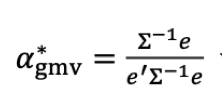

In [61]:
yrs = 6
df_q3_ret_2015 = df_q3_ret[-yrs*months:]
df_q3_ret_2015 = df_q3_ret_2015.reset_index().drop(columns = ['date'])
df_q3_ret_2015

,AN8068571086,ARP9897X1319,AU000000AOE6,AU000000PDN8,AU000000WOR2,BMG2108M2182,BMG5320C1082,CA00208D4084,CA07317Q1054,CA13321L1085,...,US7265051000,US78532P1075,US8321101003,US8454671095,US86764P1093,US9026531049,US91913Y1001,US9694571004,US98385X1063,ZAE000006896
0,0.006719,-0.164872,-0.036267,0.101381,-0.032755,0.231498,-0.075595,-0.045357,-0.161982,-0.092296,...,0.0,-0.616708,0.0,-0.125321,0.0,0.003582,0.012271,-0.092288,0.0,-0.048359
1,-0.009015,-0.100522,-0.044492,-0.017961,-0.084883,0.035793,0.099828,-0.120860,0.038085,-0.080803,...,0.0,-0.012821,0.0,-0.048736,0.0,0.088614,0.099797,-0.002447,0.0,0.047431
2,0.005589,0.044975,-0.004725,0.035626,0.026536,-0.036665,-0.043730,0.033370,-0.083643,-0.002608,...,0.0,0.220779,0.0,-0.038134,0.0,-0.028237,0.085618,0.093687,0.0,-0.095608
3,-0.004019,0.095382,-0.021014,-0.046419,-0.062021,0.027508,-0.025691,-0.105240,0.032368,-0.057268,...,0.0,-0.680851,0.0,-0.084502,0.0,0.042973,0.081473,0.033609,0.0,-0.035505
4,0.103465,0.056425,0.028333,-0.026493,0.269466,-0.018012,0.229473,0.182898,0.201626,0.213932,...,0.0,-0.216667,0.0,0.258967,0.0,-0.014832,-0.071710,0.021577,0.0,0.194198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.056431,0.286645,0.025929,0.221436,-0.087717,0.001988,0.292894,0.260780,-0.092319,-0.011380,...,0.0,0.000000,0.0,0.079365,0.0,-0.087904,-0.027463,0.048380,0.0,0.082327
68,0.001871,-0.143275,0.038956,0.412873,0.253637,-0.034939,-0.132470,0.196934,0.061839,0.140574,...,0.0,0.000000,0.0,-0.022058,0.0,-0.014810,-0.026711,0.062879,0.0,0.036017
69,-0.194313,-0.258657,-0.026587,-0.255603,-0.000491,-0.147194,-0.097708,-0.116689,-0.318008,-0.150104,...,0.0,0.000000,0.0,-0.146617,0.0,-0.023121,-0.232324,-0.086246,0.0,-0.096972
70,0.037976,-0.083209,-0.019773,-0.095238,-0.061808,-0.106459,-0.011904,0.132537,0.002247,-0.031907,...,0.0,0.000000,0.0,0.215860,0.0,-0.020107,-0.009433,-0.000533,0.0,-0.291075


In [62]:
# get covariance matrices over 10 years windows & select those from Jan 2015 to Dec 2020
yrs = 10
cov_mats = df_q3_ret.rolling(window=yrs*months).cov().iloc[12000:]

In [63]:
# Optimal min var weights
min_var_weights = []  # Empty list

for m in range(len(df_q3_ret_2015)):

    # Define objective func
    def objective(weights, cov_mat):
        return weights.T @ cov_mat @ weights

        # Define constraint func
    def constraint1(weights):
        return np.sum(weights) - 1

        # Define vars
    cov_start = m*100
    cov_end = cov_start + 100
    cov_mat = cov_mats[cov_start:cov_end]
    inv_cov = np.linalg.inv(cov_mat)
    returns = df_q3_ret_2015.iloc[m]

    constraints = [{'type': 'eq', 'fun': constraint1}]
    bounds = tuple((0, 1) for x in range(len(returns)))
    weights = np.ones(len(returns)) / len(returns)
    result = minimize(objective, weights, args=cov_mat,
                      constraints=constraints, bounds=bounds)

    month_weights = result.x / np.sum(result.x)
    month_weights = list(month_weights)
    min_var_weights.append(month_weights)


In [64]:
display(len(min_var_weights))

72

In [65]:
# throw weights in a dataframe to later add them to the main q3 dataframe
df_min_var_weights = pd.DataFrame()

for i in range(len(min_var_weights)):

    month_weights = pd.Series(min_var_weights[i])
    df_min_var_weights = pd.concat(
        [df_min_var_weights, month_weights], ignore_index=True)

df_min_var_weights.columns.values[0] = "min_var_weights"
df_min_var_weights


,min_var_weights
0,0.000000e+00
1,0.000000e+00
2,0.000000e+00
3,0.000000e+00
4,2.927707e-18
...,...
7195,0.000000e+00
7196,1.225706e-19
7197,4.784530e-20
7198,2.219864e-01


#### Now we want to add the weights to our dataframe

In [66]:
df_q3_100_sorted.head()

,date,year,month,ISIN,monthly_return,market_cap
0,2005-01-31,2005,1,AN8068571086,0.012603,NaN
1,2005-01-31,2005,1,ARP9897X1319,0.028704,NaN
2,2005-01-31,2005,1,AU000000AOE6,-0.087586,NaN
3,2005-01-31,2005,1,AU000000PDN8,-0.058855,NaN
4,2005-01-31,2005,1,AU000000WOR2,0.053326,NaN


In [67]:
df_q3_100_sorted_2015 = df_q3_100_sorted[-7200:].reset_index()

In [68]:
df_q3_100_sorted_2015['mv_weights'] = df_min_var_weights.min_var_weights

In [69]:
df_q3_100_sorted_2015

,index,date,year,month,ISIN,monthly_return,market_cap,mv_weights
0,12000,2015-01-31,2015,1,AN8068571086,0.006719,1.050730e+11,0.000000e+00
1,12001,2015-01-31,2015,1,ARP9897X1319,-0.164872,1.316640e+10,0.000000e+00
2,12002,2015-01-31,2015,1,AU000000AOE6,-0.036267,NaN,0.000000e+00
3,12003,2015-01-31,2015,1,AU000000PDN8,0.101381,4.919250e+08,0.000000e+00
4,12004,2015-01-31,2015,1,AU000000WOR2,-0.032755,1.824890e+09,2.927707e-18
...,...,...,...,...,...,...,...,...
7195,19195,2020-12-31,2020,12,US9026531049,0.178104,1.131690e+10,0.000000e+00
7196,19196,2020-12-31,2020,12,US91913Y1001,0.388083,2.306860e+10,1.225706e-19
7197,19197,2020-12-31,2020,12,US9694571004,0.113479,2.433240e+10,4.784530e-20
7198,19198,2020-12-31,2020,12,US98385X1063,0.000000,NaN,2.219864e-01


#### Now we can compute the required metrics

In [70]:
# Computing the monthly returns for each ISIN based on the market cap weight per month
df_q3_100_sorted_2015['mv_assets_monthly_weighted_returns'] = df_q3_100_sorted_2015['monthly_return'] * \
    df_q3_100_sorted_2015['mv_weights']

# Computing the AAR of the minvar-weighted portfolio by suming all the monthly weighted returns across the portfolio and dividing by 6 years of data
df_q3_100_sorted_2015['mv_AAR'] = (
    df_q3_100_sorted_2015['mv_assets_monthly_weighted_returns'].sum())/6

# Computing the annual return of the value-weighted portfolio
annual_return_df = df_q3_100_sorted_2015[[
    'year', 'mv_assets_monthly_weighted_returns']].groupby('year').sum()


def annual_return_func(row):
    year = row['year']
    return annual_return_df.loc[(year)][0]


df_q3_100_sorted_2015['mv_annual_return'] = df_q3_100_sorted_2015.apply(
    annual_return_func, axis=1)

# Computing the monthly return of the value-weighted portfolio
monthly_returns_df = df_q3_100_sorted_2015[[
    'year', 'month', 'mv_assets_monthly_weighted_returns']].groupby(['year', 'month']).sum()


def monthly_returns_func(row):
    year = row['year']
    month = row['month']
    return monthly_returns_df.loc[(year, month)][0]


df_q3_100_sorted_2015['mv_monthly_returns'] = df_q3_100_sorted_2015.apply(
    monthly_returns_func, axis=1)

# Computing portfolio volatility
df_q3_100_sorted_2015['mv_annualized_volatility'] = df_q3_100_sorted_2015['mv_monthly_returns'].std(
)*math.sqrt(12)

df_q3_100_sorted_2015


,index,date,year,month,ISIN,monthly_return,market_cap,mv_weights,mv_assets_monthly_weighted_returns,mv_AAR,mv_annual_return,mv_monthly_returns,mv_annualized_volatility
0,12000,2015-01-31,2015,1,AN8068571086,0.006719,1.050730e+11,0.000000e+00,0.000000e+00,0.047346,0.034440,0.008027,0.065172
1,12001,2015-01-31,2015,1,ARP9897X1319,-0.164872,1.316640e+10,0.000000e+00,-0.000000e+00,0.047346,0.034440,0.008027,0.065172
2,12002,2015-01-31,2015,1,AU000000AOE6,-0.036267,NaN,0.000000e+00,-0.000000e+00,0.047346,0.034440,0.008027,0.065172
3,12003,2015-01-31,2015,1,AU000000PDN8,0.101381,4.919250e+08,0.000000e+00,0.000000e+00,0.047346,0.034440,0.008027,0.065172
4,12004,2015-01-31,2015,1,AU000000WOR2,-0.032755,1.824890e+09,2.927707e-18,-9.589595e-20,0.047346,0.034440,0.008027,0.065172
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7195,19195,2020-12-31,2020,12,US9026531049,0.178104,1.131690e+10,0.000000e+00,0.000000e+00,0.047346,0.018606,0.004410,0.065172
7196,19196,2020-12-31,2020,12,US91913Y1001,0.388083,2.306860e+10,1.225706e-19,4.756759e-20,0.047346,0.018606,0.004410,0.065172
7197,19197,2020-12-31,2020,12,US9694571004,0.113479,2.433240e+10,4.784530e-20,5.429416e-21,0.047346,0.018606,0.004410,0.065172
7198,19198,2020-12-31,2020,12,US98385X1063,0.000000,NaN,2.219864e-01,0.000000e+00,0.047346,0.018606,0.004410,0.065172


In [71]:
# Other general statistics
mv_min = df_q3_100_sorted_2015['mv_annual_return'].min()
mv_max = df_q3_100_sorted_2015['mv_annual_return'].max()
mv_sharperatio = (df_q3_100_sorted_2015['mv_AAR'].mean(
) - risk_free_rate)/df_q3_100_sorted_2015['mv_annualized_volatility'].mean()


In [72]:
mv_AAR = (df_q3_100_sorted_2015['mv_assets_monthly_weighted_returns'].sum())/6
mv_volatility = df_q3_100_sorted_2015['mv_monthly_returns'].std()*math.sqrt(12)

print(f'AAR: {round(mv_AAR*100, 3)}%')
print(f'Annualized volatility: {round(mv_volatility*100, 3)}%')
print(f'Max yearly return: {round(mv_max*100, 3)}%')
print(f'Min yearly return: {round(mv_min*100, 3)}%')
print(f'Sharpe ratio: {round(mv_sharperatio, 3)}')

AAR: 4.735%
Annualized volatility: 6.517%
Max yearly return: 7.906%
Min yearly return: 1.861%
Sharpe ratio: -0.041


Finally, here we have gathered the much wanted statistics of our portfolio!
| AAR                    | 4.735% |
|------------------------|--------|
| Annualized volatility: | 6.517% |
| Max yearly return:     | 7.906% |
| Min yearly return:     | 1.861% |
| Sharpe ratio:          | -0.041 |

### Q.4 - For this question, keep the same randomly selected firms from the previous point. Build an optimal portfolios with various target portfolio returns (e.g., from 2% to 16% with 2% increments). Plot the efficient frontier as well as the individual assets. Which portfolio is the most efficient in terms of Sharpe ratio?


For the fourth question we will start to copy the dataframes created in question 3. 

In [73]:
df_q4 = df_q3.copy()
df_q4_100_sorted = df_q3_100_sorted.copy()
df_q4_100_sorted_2015 = df_q3_100_sorted_2015.copy()
df_q4_ret = df_q3_ret.copy()
df_q4_ret_2015 = df_q3_ret_2015.copy()

In [74]:
volatility_list = []
return_list = []
portfolio_list = []
month_cov_matrix = df_q4_ret.cov()

# Optimal min var weights for a given return mu


def create_port(mu):
    """mu represents the target portfolio return """
    target = mu*16

    from scipy.optimize import minimize

    inv_cov = np.linalg.inv(month_cov_matrix)
    returns = df_q4_ret

    def objective(weights, month_cov_matrix):
        return weights.T @ month_cov_matrix @ weights

    def constraint1(weights):
        return np.sum(weights) - 1

    def constraint2(weights):
        return weights.T @ returns.sum() - target

    constraints = [{'type': 'eq', 'fun': constraint1},
                   {'type': 'eq', 'fun': constraint2}]

    bounds = tuple((0, 1) for x in range(len(returns.columns)))

    weights = np.ones(len(returns.columns)) / len(returns.columns)

    result = minimize(objective, weights, args=month_cov_matrix,
                      constraints=constraints, bounds=bounds)

    min_var_weights = result.x / np.sum(result.x)

    min_var_weights = list(min_var_weights)

    # Creating a dataframe with the weights
    df_min_var_weights = pd.DataFrame()

    for i in range(192):

        portfolio_weights = pd.Series(min_var_weights)
        df_min_var_weights = pd.concat(
            [df_min_var_weights, portfolio_weights], ignore_index=True)

    df_min_var_weights.columns.values[0] = f"{mu}_var_weights"
    # Adding the weights to the df_q4 database
    df_q4_100_sorted[f'{mu}_weights'] = df_min_var_weights[f'{mu}_var_weights']
    # Computing the monthly returns for each ISIN based on the market cap weight per month
    df_q4_100_sorted[f'{mu}_assets_monthly_weighted_returns'] = df_q4_100_sorted['monthly_return'] * \
        df_q4_100_sorted[f'{mu}_weights']

    # Computing the AAR of the minvar-weighted portfolio by suming all the monthly weighted returns across the portfolio and dividing by 6 years of data
    df_q4_100_sorted[f'{mu}_AAR'] = (
        df_q4_100_sorted[f'{mu}_assets_monthly_weighted_returns'].sum())/16

    # Computing the annual return of the value-weighted portfolio
    annual_return_df = df_q4_100_sorted[[
        'year', f'{mu}_assets_monthly_weighted_returns']].groupby('year').sum()

    def annual_return_func(row):
        year = row['year']
        return annual_return_df.loc[(year)][0]
    df_q4_100_sorted[f'{mu}_annual_return'] = df_q4_100_sorted.apply(
        annual_return_func, axis=1)

    # Computing the monthly return of the value-weighted portfolio
    monthly_returns_df = df_q4_100_sorted[[
        'year', 'month', f'{mu}_assets_monthly_weighted_returns']].groupby(['year', 'month']).sum()

    def monthly_returns_func(row):
        year = row['year']
        month = row['month']
        return monthly_returns_df.loc[(year, month)][0]

    df_q4_100_sorted[f'{mu}_monthly_returns'] = df_q4_100_sorted.apply(
        monthly_returns_func, axis=1)

    # Computing portfolio volatility
    df_q4_100_sorted[f'{mu}_annualized_volatility'] = df_q4_100_sorted[f'{mu}_monthly_returns'].std(
    )*math.sqrt(12)

    # Creating lists of metrics
    volatility_list.append(
        df_q4_100_sorted[f'{mu}_annualized_volatility'].values[0])
    return_list.append(df_q4_100_sorted[f'{mu}_AAR'].values[0])
    portfolio_list.append(f'{mu}_portfolio')


for i in range(2, 50, 2):
    create_port(i/100)

df_q4_100_sorted


,date,year,month,ISIN,monthly_return,market_cap,0.02_weights,0.02_assets_monthly_weighted_returns,0.02_AAR,0.02_annual_return,...,0.46_AAR,0.46_annual_return,0.46_monthly_returns,0.46_annualized_volatility,0.48_weights,0.48_assets_monthly_weighted_returns,0.48_AAR,0.48_annual_return,0.48_monthly_returns,0.48_annualized_volatility
0,2005-01-31,2005,1,AN8068571086,0.012603,NaN,0.000000e+00,0.000000e+00,0.02,0.254891,...,0.452643,0.760871,0.681159,1.240736,3.841585e-18,4.841506e-20,0.452643,0.760871,0.681159,1.240736
1,2005-01-31,2005,1,ARP9897X1319,0.028704,NaN,0.000000e+00,0.000000e+00,0.02,0.254891,...,0.452643,0.760871,0.681159,1.240736,2.629518e-13,7.547797e-15,0.452643,0.760871,0.681159,1.240736
2,2005-01-31,2005,1,AU000000AOE6,-0.087586,NaN,9.474822e-18,-8.298575e-19,0.02,0.254891,...,0.452643,0.760871,0.681159,1.240736,1.527587e-17,-1.337945e-18,0.452643,0.760871,0.681159,1.240736
3,2005-01-31,2005,1,AU000000PDN8,-0.058855,NaN,6.104961e-18,-3.593054e-19,0.02,0.254891,...,0.452643,0.760871,0.681159,1.240736,5.934967e-13,-3.493005e-14,0.452643,0.760871,0.681159,1.240736
4,2005-01-31,2005,1,AU000000WOR2,0.053326,NaN,0.000000e+00,0.000000e+00,0.02,0.254891,...,0.452643,0.760871,0.681159,1.240736,2.730241e-17,1.455927e-18,0.452643,0.760871,0.681159,1.240736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19195,2020-12-31,2020,12,US9026531049,0.178104,1.131690e+10,0.000000e+00,0.000000e+00,0.02,-0.056914,...,0.452643,-0.026190,0.010129,1.240736,3.349447e-18,5.965494e-19,0.452643,-0.026190,0.010129,1.240736
19196,2020-12-31,2020,12,US91913Y1001,0.388083,2.306860e+10,0.000000e+00,0.000000e+00,0.02,-0.056914,...,0.452643,-0.026190,0.010129,1.240736,1.920442e-13,7.452912e-14,0.452643,-0.026190,0.010129,1.240736
19197,2020-12-31,2020,12,US9694571004,0.113479,2.433240e+10,0.000000e+00,0.000000e+00,0.02,-0.056914,...,0.452643,-0.026190,0.010129,1.240736,4.222164e-18,4.791251e-19,0.452643,-0.026190,0.010129,1.240736
19198,2020-12-31,2020,12,US98385X1063,0.000000,NaN,3.122502e-17,0.000000e+00,0.02,-0.056914,...,0.452643,-0.026190,0.010129,1.240736,1.483783e-18,0.000000e+00,0.452643,-0.026190,0.010129,1.240736


In [75]:
(df_q4_100_sorted[['ISIN','monthly_return']].groupby('ISIN').mean()*months).max()

monthly_return    0.452643
dtype: float64

In [76]:
# Computing the AAR for every assets
asset_AAR_df = df_q4_100_sorted[[
    'ISIN', 'monthly_return']].groupby('ISIN').mean()*12


def asset_AAR_func(row):
    ISIN = row['ISIN']
    return asset_AAR_df.loc[(ISIN)][0]


df_q4_100_sorted['assets_AAR'] = df_q4_100_sorted.apply(asset_AAR_func, axis=1)
# Computing the Annualized volatility for every assets:
asset_volatility_df = df_q4_100_sorted[['ISIN', 'monthly_return']].groupby(
    'ISIN').std()*math.sqrt(12)


def asset_volatility_func(row):
    ISIN = row['ISIN']
    return asset_volatility_df.loc[(ISIN)][0]


df_q4_100_sorted['assets_volatility'] = df_q4_100_sorted.apply(
    asset_volatility_func, axis=1)
# Computing the sharpe ratio:
df_q4_100_sorted['assets_SharpeRatio'] = (
    df_q4_100_sorted['assets_AAR']-risk_free_rate)/df_q4_100_sorted['assets_volatility']
df_q4_100_sorted


,date,year,month,ISIN,monthly_return,market_cap,0.02_weights,0.02_assets_monthly_weighted_returns,0.02_AAR,0.02_annual_return,...,0.46_annualized_volatility,0.48_weights,0.48_assets_monthly_weighted_returns,0.48_AAR,0.48_annual_return,0.48_monthly_returns,0.48_annualized_volatility,assets_AAR,assets_volatility,assets_SharpeRatio
0,2005-01-31,2005,1,AN8068571086,0.012603,NaN,0.000000e+00,0.000000e+00,0.02,0.254891,...,1.240736,3.841585e-18,4.841506e-20,0.452643,0.760871,0.681159,1.240736,0.070937,0.372584,0.056194
1,2005-01-31,2005,1,ARP9897X1319,0.028704,NaN,0.000000e+00,0.000000e+00,0.02,0.254891,...,1.240736,2.629518e-13,7.547797e-15,0.452643,0.760871,0.681159,1.240736,0.068938,0.492394,0.038461
2,2005-01-31,2005,1,AU000000AOE6,-0.087586,NaN,9.474822e-18,-8.298575e-19,0.02,0.254891,...,1.240736,1.527587e-17,-1.337945e-18,0.452643,0.760871,0.681159,1.240736,0.233029,0.423224,0.432463
3,2005-01-31,2005,1,AU000000PDN8,-0.058855,NaN,6.104961e-18,-3.593054e-19,0.02,0.254891,...,1.240736,5.934967e-13,-3.493005e-14,0.452643,0.760871,0.681159,1.240736,0.277071,0.972955,0.233383
4,2005-01-31,2005,1,AU000000WOR2,0.053326,NaN,0.000000e+00,0.000000e+00,0.02,0.254891,...,1.240736,2.730241e-17,1.455927e-18,0.452643,0.760871,0.681159,1.240736,0.211138,0.477465,0.337486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19195,2020-12-31,2020,12,US9026531049,0.178104,1.131690e+10,0.000000e+00,0.000000e+00,0.02,-0.056914,...,1.240736,3.349447e-18,5.965494e-19,0.452643,-0.026190,0.010129,1.240736,0.121287,0.285153,0.249994
19196,2020-12-31,2020,12,US91913Y1001,0.388083,2.306860e+10,0.000000e+00,0.000000e+00,0.02,-0.056914,...,1.240736,1.920442e-13,7.452912e-14,0.452643,-0.026190,0.010129,1.240736,0.180724,0.435513,0.300161
19197,2020-12-31,2020,12,US9694571004,0.113479,2.433240e+10,0.000000e+00,0.000000e+00,0.02,-0.056914,...,1.240736,4.222164e-18,4.791251e-19,0.452643,-0.026190,0.010129,1.240736,0.133781,0.361585,0.231704
19198,2020-12-31,2020,12,US98385X1063,0.000000,NaN,3.122502e-17,0.000000e+00,0.02,-0.056914,...,1.240736,1.483783e-18,0.000000e+00,0.452643,-0.026190,0.010129,1.240736,0.069974,0.203641,0.098085


In [77]:
results_list = []
for i in range(len(volatility_list)):
    results_list.append([volatility_list[i], return_list[i]])

# Computing the sharpe ratio for all the created portfolio
risk_free = 2
for i in range(int(len(results_list))):
    sharpe_ratio = (results_list[i][1]*100-risk_free)/(results_list[i][0]*100)
    results_list[i].append(sharpe_ratio)

# Define the lists to be used as index, values, and column names
index_list = portfolio_list
values_list = results_list
column_names = ['Portfolio volatility',
                'Portfolio return', 'Portfolio Sharpe ratio']

# Create a pandas DataFrame
df = pd.DataFrame(values_list, index=index_list, columns=column_names)


In [78]:
df_top5_sorted = df.sort_values(by=['Portfolio Sharpe ratio'], ascending=False).head(5).copy()
df_top5_sorted

,Portfolio volatility,Portfolio return,Portfolio Sharpe ratio
0.22_portfolio,0.132766,0.22,1.506408
0.24_portfolio,0.146113,0.24,1.505688
0.2_portfolio,0.120778,0.20,1.490339
0.26_portfolio,0.161386,0.26,1.487116
0.28_portfolio,0.178029,0.28,1.460435


Now we can finally start creating the efficiency frontier.

In [79]:
import plotly.graph_objs as go

# Define the x and y values
x = df['Portfolio volatility']
y = df['Portfolio return']
z = df['Portfolio Sharpe ratio'] # Use this dimension to give color to show the Sharpe Ratio

# Define the color scale
color_scale = [[0, 'firebrick'], [0.5, 'lightblue'], [1, 'darkblue']]

# Create the scatter plot for the portfolio
trace_portfolio = go.Scatter(
    x=x,
    y=y,
    mode='lines+markers',
    marker=dict(
        size=8,
        color=z,
        colorscale=color_scale,
        cmin=-0.2,
        cmax=1.6,
        showscale=True
    ),
    line=dict(
        width=5,
        color='lightgrey',
    ),
    name='Portfolio',
    hovertemplate='Portfolio volatility: %{x}<br>Portfolio return: %{y}<br> Portfolio Sharpe ratio %{marker.color:.3f} <extra></extra>')

# Create the scatter plot for the assets
trace_assets = go.Scatter(
    x=df_q4_100_sorted['assets_volatility'],
    y=df_q4_100_sorted['assets_AAR'],
    mode='markers',
    marker=dict(
        size=5,
        color=df_q4_100_sorted['assets_SharpeRatio'],
        colorscale=color_scale,
        cmin=-0.2,
        cmax=1.6,
        colorbar=dict(
            title={
                'text': 'Sharpe Ratio',
                'side': 'right',

            }
        ),
        showscale=True,
        symbol='x'
    ),
    name='Individual Assets',
    hovertemplate='Asset volatility: %{x}<br>Asset return: %{y}<br>Asset Sharpe Ratio: %{marker.color:.3f} <extra></extra>')


# Add axis labels and a title
layout = go.Layout(
    title='Return vs. Volatility: Efficiency Frontier',
    xaxis=dict(title='Volatility', showgrid=True),
    yaxis=dict(title='Return', showgrid=True),
    legend=dict(x=1, y=-0.2),
    autosize=True  # ,
    # plot_bgcolor='white'
)

# Create a figure
fig = go.Figure(data=[trace_portfolio, trace_assets], layout=layout)

# Show the plot
fig.show()


### Q.5 - Choose an appropriate benchmark, which corresponds to the region of your dataset. Compare the performance of your portfolios (equally-weighted, value-weighted, and minimum variance) with the benchmark. Comment on the differences.


In [80]:
# our comparison timespan is 6 years for 100 companies
comp_timespan = 6*12*100
comp_timespan

7200

#### Value-weighted portfolio prep (select 2015 - 2020)

In [81]:
df_q2_v

,date,year,month,ISIN,monthly_return,market_cap,annual_returns,value_weight,vw_asset_monthly_weighted_returns,vw_AAR,vw_annual_return,vw_monthly_return,vw_annualized_volatility
0,2005-01-31,2005,1,AN8068571086,0.012603,NaN,0.468026,NaN,NaN,0.06779,0.000000,0.000000,0.226115
1,2005-02-28,2005,2,AN8068571086,0.063502,NaN,0.468026,NaN,NaN,0.06779,0.000000,0.000000,0.226115
2,2005-03-31,2005,3,AN8068571086,0.093039,NaN,0.468026,NaN,NaN,0.06779,0.000000,0.000000,0.226115
3,2005-04-30,2005,4,AN8068571086,-0.038401,NaN,0.468026,NaN,NaN,0.06779,0.000000,0.000000,0.226115
4,2005-05-31,2005,5,AN8068571086,-0.027085,NaN,0.468026,NaN,NaN,0.06779,0.000000,0.000000,0.226115
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35515,2020-08-31,2020,8,ZAE000006896,0.082327,5.154680e+09,1.030514,0.002621,0.000216,0.06779,-0.074265,-0.003596,0.226115
35516,2020-09-30,2020,9,ZAE000006896,0.036017,4.877320e+09,1.030514,0.002824,0.000102,0.06779,-0.074265,0.017528,0.226115
35517,2020-10-31,2020,10,ZAE000006896,-0.096972,3.275830e+09,1.030514,0.001902,-0.000184,0.06779,-0.074265,-0.108465,0.226115
35518,2020-11-30,2020,11,ZAE000006896,-0.291075,4.933380e+09,1.030514,0.002382,-0.000693,0.06779,-0.074265,-0.014693,0.226115


In [82]:
df_q2_v_100 = df_q2_v[df_q2_v.ISIN.isin(randfirms) == True].copy()

df_q2_v_100_sorted = df_q2_v_100.sort_values(by=['date','ISIN'], inplace = False).copy()
df_q2_v_100_sorted = df_q2_v_100_sorted.reset_index(drop=True)

df_q2_v_100_sorted_2015 = df_q2_v_100_sorted[-comp_timespan:].copy()
df_q2_v_100_sorted_2015

,date,year,month,ISIN,monthly_return,market_cap,annual_returns,value_weight,vw_asset_monthly_weighted_returns,vw_AAR,vw_annual_return,vw_monthly_return,vw_annualized_volatility
12000,2015-01-31,2015,1,AN8068571086,0.006719,1.050730e+11,-0.027115,0.030997,0.000208,0.06779,-0.090799,-0.010864,0.226115
12001,2015-01-31,2015,1,ARP9897X1319,-0.164872,1.316640e+10,-0.313132,0.003884,-0.000640,0.06779,-0.090799,-0.010864,0.226115
12002,2015-01-31,2015,1,AU000000AOE6,-0.036267,NaN,-0.145461,NaN,NaN,0.06779,-0.090799,-0.010864,0.226115
12003,2015-01-31,2015,1,AU000000PDN8,0.101381,4.919250e+08,-0.332542,0.000145,0.000015,0.06779,-0.090799,-0.010864,0.226115
12004,2015-01-31,2015,1,AU000000WOR2,-0.032755,1.824890e+09,-0.503189,0.000538,-0.000018,0.06779,-0.090799,-0.010864,0.226115
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19195,2020-12-31,2020,12,US9026531049,0.178104,1.131690e+10,-0.071884,0.005335,0.000950,0.06779,-0.074265,0.227947,0.226115
19196,2020-12-31,2020,12,US91913Y1001,0.388083,2.306860e+10,-0.178907,0.010875,0.004220,0.06779,-0.074265,0.227947,0.226115
19197,2020-12-31,2020,12,US9694571004,0.113479,2.433240e+10,0.160478,0.011470,0.001302,0.06779,-0.074265,0.227947,0.226115
19198,2020-12-31,2020,12,US98385X1063,0.000000,NaN,0.000000,NaN,NaN,0.06779,-0.074265,0.227947,0.226115


In [83]:
# Get weights with function from Q2
df_q2_v_100_sorted_2015['value_weight'] = df_q2_v_100_sorted_2015.apply(
    val_weight_func, axis=1)

# Computing the monthly returns for each ISIN based on the market cap weight per month
df_q2_v_100_sorted_2015['vw_asset_monthly_weighted_returns'] = df_q2_v_100_sorted_2015['monthly_return'] * \
    df_q2_v_100_sorted_2015['value_weight']

# Computing the AAR of the value-weighted portfolio by suming all the monthly weighted returns across the portfolio and dividing by 6 years of data
df_q2_v_100_sorted_2015['vw_AAR'] = (
    df_q2_v_100_sorted_2015['vw_asset_monthly_weighted_returns'].sum())/6

# Computing the annual returns of the value-weighted portfolio
vw_annual_return_df = df_q2_v_100_sorted_2015[[
    'year', 'vw_asset_monthly_weighted_returns']].groupby('year').sum()


def vw_annual_return_func(row):
    year = row['year']
    return vw_annual_return_df.loc[(year)][0]


df_q2_v_100_sorted_2015['vw_annual_return'] = df_q2_v_100_sorted_2015.apply(
    vw_annual_return_func, axis=1)

# Computing the monthly return of the value-weighted portfolio
vw_monthly_return_df = df_q2_v_100_sorted_2015[[
    'year', 'month', 'vw_asset_monthly_weighted_returns']].groupby(['year', 'month']).sum()


def vw_monthly_return_func(row):
    year = row['year']
    month = row['month']
    return vw_monthly_return_df.loc[(year, month)][0]


df_q2_v_100_sorted_2015['vw_monthly_return'] = df_q2_v_100_sorted_2015.apply(
    vw_monthly_return_func, axis=1)

# Computing portfolio statistics
df_q2_v_100_sorted_2015['vw_annualized_volatility'] = df_q2_v_100_sorted_2015['vw_monthly_return'].std(
)*math.sqrt(12)
vw_min = df_q2_v_100_sorted_2015['vw_annual_return'].min()
vw_max = df_q2_v_100_sorted_2015['vw_annual_return'].max()
vw_sharperatio = (df_q2_v_100_sorted_2015['vw_annual_return'].mean(
) - risk_free_rate)/df_q2_v_100_sorted_2015['vw_annualized_volatility'].mean()
# Showing dataframe
df_q2_v_100_sorted_2015


,date,year,month,ISIN,monthly_return,market_cap,annual_returns,value_weight,vw_asset_monthly_weighted_returns,vw_AAR,vw_annual_return,vw_monthly_return,vw_annualized_volatility
12000,2015-01-31,2015,1,AN8068571086,0.006719,1.050730e+11,-0.027115,0.030997,0.000208,0.026485,-0.018838,-0.008908,0.130125
12001,2015-01-31,2015,1,ARP9897X1319,-0.164872,1.316640e+10,-0.313132,0.003884,-0.000640,0.026485,-0.018838,-0.008908,0.130125
12002,2015-01-31,2015,1,AU000000AOE6,-0.036267,NaN,-0.145461,NaN,NaN,0.026485,-0.018838,-0.008908,0.130125
12003,2015-01-31,2015,1,AU000000PDN8,0.101381,4.919250e+08,-0.332542,0.000145,0.000015,0.026485,-0.018838,-0.008908,0.130125
12004,2015-01-31,2015,1,AU000000WOR2,-0.032755,1.824890e+09,-0.503189,0.000538,-0.000018,0.026485,-0.018838,-0.008908,0.130125
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19195,2020-12-31,2020,12,US9026531049,0.178104,1.131690e+10,-0.071884,0.005335,0.000950,0.026485,-0.042931,0.124550,0.130125
19196,2020-12-31,2020,12,US91913Y1001,0.388083,2.306860e+10,-0.178907,0.010875,0.004220,0.026485,-0.042931,0.124550,0.130125
19197,2020-12-31,2020,12,US9694571004,0.113479,2.433240e+10,0.160478,0.011470,0.001302,0.026485,-0.042931,0.124550,0.130125
19198,2020-12-31,2020,12,US98385X1063,0.000000,NaN,0.000000,NaN,NaN,0.026485,-0.042931,0.124550,0.130125


In [84]:
vw_AAR = df_q2_v_100_sorted_2015['vw_AAR'].mean()
vw_volatility = df_q2_v_100_sorted_2015['vw_annualized_volatility'].mean()

print(f'Equally-weighted portfolio statistics:\n\nAAR: {vw_AAR}')
print(f'Max yearly return: {vw_max}')
print(f'Min yearly return: {vw_min}')
print(f'Sharpe ratio: {vw_sharperatio}')
print(f'Annualized volatility: {vw_volatility}')

Equally-weighted portfolio statistics:

AAR: 0.026484619871693357
Max yearly return: 0.09849042348922138
Min yearly return: -0.042931470875594235
Sharpe ratio: -0.18071358611185975
Annualized volatility: 0.13012513687684307


#### Equally-weighted portfolio prep (select 2015 - 2020)

In [85]:
df_q2_e_100 = df_q2_e[df_q2_e.ISIN.isin(randfirms) == True].copy()

df_q2_e_100_sorted = df_q2_e_100.sort_values(
    by=['date', 'ISIN'], inplace=False).copy()
df_q2_e_100_sorted = df_q2_e_100_sorted.reset_index(drop=True)

df_q2_e_100_sorted_2015 = df_q2_e_100_sorted[-comp_timespan:].copy()
df_q2_e_100_sorted_2015


,date,year,month,ISIN,monthly_return,market_cap,annual_returns,ew_AAR,ew_annualized_volatility,ew_annual_return,ew_monthly_return
12000,2015-01-31,2015,1,AN8068571086,0.006719,1.050730e+11,-0.027115,0.114505,0.466141,-0.147892,-5.857180
12001,2015-01-31,2015,1,ARP9897X1319,-0.164872,1.316640e+10,-0.313132,0.114505,0.466141,-0.147892,-5.857180
12002,2015-01-31,2015,1,AU000000AOE6,-0.036267,NaN,-0.145461,0.114505,0.466141,-0.147892,-5.857180
12003,2015-01-31,2015,1,AU000000PDN8,0.101381,4.919250e+08,-0.332542,0.114505,0.466141,-0.147892,-5.857180
12004,2015-01-31,2015,1,AU000000WOR2,-0.032755,1.824890e+09,-0.503189,0.114505,0.466141,-0.147892,-5.857180
...,...,...,...,...,...,...,...,...,...,...,...
19195,2020-12-31,2020,12,US9026531049,0.178104,1.131690e+10,-0.071884,0.114505,0.466141,0.046559,44.347042
19196,2020-12-31,2020,12,US91913Y1001,0.388083,2.306860e+10,-0.178907,0.114505,0.466141,0.046559,44.347042
19197,2020-12-31,2020,12,US9694571004,0.113479,2.433240e+10,0.160478,0.114505,0.466141,0.046559,44.347042
19198,2020-12-31,2020,12,US98385X1063,0.000000,NaN,0.000000,0.114505,0.466141,0.046559,44.347042


In [86]:
# Computing the AAR of the equally-weighted portfolio for the 6 years under observation
AAR = df_q2_e_100_sorted_2015[['ISIN', 'monthly_return']].groupby(
    'ISIN').apply(lambda x: x.mean()*12).copy()


def AAR_func(row):
    ISIN = row['ISIN']
    return AAR.loc[(ISIN)][0]


# Computing the AAR of the value-weighted portfolio by suming all the monthly weighted returns across the portfolio and dividing by 6 years of data
df_q2_e_100_sorted['ew_AAR'] = (df_q2_e_100_sorted['monthly_return'].sum())/6

df_q2_e_100_sorted_2015['ew_annualized_volatility'] = df_q2_e_100_sorted_2015.monthly_return.std(
)*math.sqrt(12)

# Computing the annual return of the equally-weighted portolio
eq_weight_port_df = df_q2_e_100_sorted_2015[[
    'year', 'annual_returns']].groupby('year').mean()


def eq_weight_port_func(row):
    year = row['year']
    return eq_weight_port_df.loc[year][0]


df_q2_e_100_sorted_2015['ew_annual_return'] = df_q2_e_100_sorted_2015.apply(
    eq_weight_port_func, axis=1)

# Computing the monthly return of the value-weighted portfolio
ew_monthly_return_df = df_q2_e_100_sorted_2015[[
    'year', 'month', 'monthly_return']].groupby(['year', 'month']).sum()


def ew_monthly_return_func(row):
    year = row['year']
    month = row['month']
    return ew_monthly_return_df.loc[(year, month)][0]


df_q2_e_100_sorted_2015['ew_monthly_return'] = df_q2_e_100_sorted_2015.apply(
    ew_monthly_return_func, axis=1)

# Computing portfolio statistics
ew_min = df_q2_e_100_sorted_2015['ew_annual_return'].min()
ew_max = df_q2_e_100_sorted_2015['ew_annual_return'].max()
ew_sharperatio = (df_q2_e_100_sorted_2015['ew_AAR'].mean(
) - risk_free_rate)/df_q2_e_100_sorted_2015['ew_annualized_volatility'].mean()
# Showing dataframe
df_q2_e_100_sorted_2015[190:196]


/var/folders/bq/x4f4q_6s4sz988ksbbmgknk00000gn/T/ipykernel_36365/2476957476.py:3: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



,date,year,month,ISIN,monthly_return,market_cap,annual_returns,ew_AAR,ew_annualized_volatility,ew_annual_return,ew_monthly_return
12190,2015-02-28,2015,2,US7265051000,0.000000,NaN,0.000000,0.114505,0.473179,-0.11891,0.193124
12191,2015-02-28,2015,2,US78532P1075,-0.012821,NaN,-2.215423,0.114505,0.473179,-0.11891,0.193124
12192,2015-02-28,2015,2,US8321101003,0.000000,NaN,0.000000,0.114505,0.473179,-0.11891,0.193124
12193,2015-02-28,2015,2,US8454671095,-0.048736,9.642760e+09,-1.106870,0.114505,0.473179,-0.11891,0.193124
12194,2015-02-28,2015,2,US86764P1093,0.000000,NaN,0.000000,0.114505,0.473179,-0.11891,0.193124
12195,2015-02-28,2015,2,US9026531049,0.088614,8.264980e+09,0.244039,0.114505,0.473179,-0.11891,0.193124


In [87]:
ew_AAR = df_q2_e_100_sorted_2015['ew_AAR'].mean()
ew_volatility = df_q2_e_100_sorted_2015['ew_annualized_volatility'].mean()

print(f'Equally-weighted portfolio statistics:\n\nAAR: {ew_AAR}')
print(f'Max yearly return: {ew_max}')
print(f'Min yearly return: {ew_min}')
print(f'Sharpe ratio: {ew_sharperatio}')
print(f'Annualized volatility: {ew_volatility}')


Equally-weighted portfolio statistics:

AAR: 0.11450456815374115
Max yearly return: 0.16210216354569645
Min yearly return: -0.1189101597781955
Sharpe ratio: 0.13632158008542872
Annualized volatility: 0.4731794343442765


#### Comparing the 3 portfolios (2015-2020)

In [88]:
# Generate sample data
x = df_q2_v_100_sorted_2015.groupby('year').year.mean()
y1 = df_q2_v_100_sorted_2015.groupby('year').vw_annual_return.mean()
y2 = df_q2_e_100_sorted_2015.groupby('year').ew_annual_return.mean()
y3 = df_q3_100_sorted_2015.groupby('year').mv_annual_return.mean()

# Create figure
fig = go.Figure()

# Add time series traces
fig.add_trace(go.Scatter(x=x, y=y1, name='Value-weighted portfolio annual returns',
              line=dict(color='lightblue', width=5)))
fig.add_trace(go.Scatter(x=x, y=y2, name='Equally-weighted portfolio annual returns',
              line=dict(color='darkgreen', width=5)))
fig.add_trace(go.Scatter(x=x, y=y3, name='Minimum variance portfolio annual returns',
              line=dict(color='pink', width=5)))

# Update layout
fig.update_layout(title='Portfolio Performance by Year',
                  xaxis_title='Year',
                  yaxis_title='Annual Return',
                  legend_title='Portfolio Type',
                  font=dict(size=16),
                  plot_bgcolor='white')

# Center legend title
fig.update_layout(legend=dict(title=dict(text='Portfolio Type', font=dict(size=8), side='top')),
                  legend_title_font=dict(size=12),
                  legend_title_side='top')

# Center plot title
fig.update_layout(title=dict(text='Portfolio Performance by Year',
                  font=dict(size=22), x=0.4, xanchor='center'))


# Customize axes
fig.update_xaxes(tickvals=x,
                 ticktext=[str(int(val)) for val in x],
                 tickangle=45,
                 dtick=1,
                 tickfont=dict(size=12),
                 gridcolor='lightgray',
                 zeroline=False)

fig.update_yaxes(tickfont=dict(size=12),
                 gridcolor='lightgray',
                 zeroline=False)

fig.show()


In [89]:
# Create a new table
table = prettytable.PrettyTable()

# Add the columns to the table
table.field_names = ['Portfolio','Value-weighted portfolio','Equally-weighted portfolio', 'Minimum variance portfolio']

# Add the rows to the table
tabledf={
    'Annualized average return': ['Annualized average return (%)',round(vw_AAR*100,3),round(ew_AAR*100,3), round(mv_AAR*100,3)],
    'Annualized Volatility': ['Annualized volatility (%)',round(vw_volatility*100,3),round(ew_volatility*100,3), round(mv_volatility*100,3)],
    'Minimum return': ['Minimum return (%)',round(vw_min*100,3),round(ew_min*100,3), round(mv_min*100,3)],
    'Maximum return': ['Maximum return (%)',round(vw_max*100,3),round(ew_max*100,3), round(mv_max*100,3)],
    'Sharpe Ratio': ['Sharpe Ratio',round(vw_sharperatio,3),round(ew_sharperatio,3), round(mv_sharperatio,3)]
}

for row in tabledf:
    table.add_row(tabledf[row])

# Add borders to the table
table.hrules = prettytable.ALL
table.header = True
table.set_style(prettytable.SINGLE_BORDER)

# Save the table to a file
with open('value&equal.txt', 'w') as f:
    f.write(str(table))
    
# Display the table
print(table)

┌───────────────────────────────┬──────────────────────────┬────────────────────────────┬────────────────────────────┐
│           Portfolio           │ Value-weighted portfolio │ Equally-weighted portfolio │ Minimum variance portfolio │
├───────────────────────────────┼──────────────────────────┼────────────────────────────┼────────────────────────────┤
│ Annualized average return (%) │          2.648           │           11.45            │           4.735            │
├───────────────────────────────┼──────────────────────────┼────────────────────────────┼────────────────────────────┤
│   Annualized volatility (%)   │          13.013          │           47.318           │           6.517            │
├───────────────────────────────┼──────────────────────────┼────────────────────────────┼────────────────────────────┤
│       Minimum return (%)      │          -4.293          │          -11.891           │           1.861            │
├───────────────────────────────┼───────────────

### Q.6 - Compute and comment on the simple correlation between returns, volatility, size.


Lou-Salomé told us to do it this way (not the correlations on the portfolios but on the assets).

In [90]:
df_caps.date[0]

Timestamp('2007-01-31 00:00:00')

We therefore need to compute AAR, volatility, and size starting from 2007.

In [91]:
display(nrg_caps.isnull().sum().sum())
display(nrg_caps)
display(nrg_caps['AN8068571086'].mean())
display(nrg_returns)

3969

,AN8068571086,AU000000AOE6,AU000000ERA9,AU000000ORG5,AU000000PDN8,AU000000WHC8,AU000000WOR2,BE0003816338,BMG2108M2182,BMG5320C1082,...,US8454671095,US8475601097,US86764P1093,RU000A0B6NK6,US9026531049,US91913Y1001,US9694571004,US98385X1063,ARP9897X1319,ZAE000006896
0,74825700000,5.135480e+08,3079170000,6.037320e+09,3.372720e+09,NaN,3.423190e+09,1555140000,3010950000,2.424230e+09,...,6471650000,1.646810e+10,7.660140e+09,NaN,4416550000,32791300000,16095200000,1.846830e+10,18410400000,2.134640e+10
1,74012500000,5.645100e+08,3678900000,6.068140e+09,3.591960e+09,NaN,4.794950e+09,1587330000,3043510000,2.304480e+09,...,6610540000,1.622220e+10,7.819090e+09,NaN,4562190000,34760700000,16124300000,1.899390e+10,17123300000,2.019070e+10
2,81437400000,7.861750e+08,4286560000,6.333870e+09,3.940580e+09,NaN,5.134680e+09,1766810000,3141950000,2.416050e+09,...,6929820000,1.658860e+10,8.547130e+09,NaN,4287570000,38959300000,17015200000,2.016770e+10,16507100000,2.090860e+10
3,87013400000,8.771610e+08,3995060000,6.589470e+09,4.171120e+09,NaN,5.220020e+09,1770770000,3144040000,2.155100e+09,...,7135780000,1.648120e+10,9.173000e+09,NaN,4208900000,38555600000,17666300000,1.999130e+10,16494200000,2.173170e+10
4,91774800000,1.210180e+09,3620750000,6.334960e+09,4.341900e+09,NaN,5.632360e+09,1949750000,3636350000,2.562450e+09,...,8087210000,1.682560e+10,9.680650e+09,NaN,4125110000,40965700000,19019700000,2.137570e+10,16691800000,2.271890e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,26387800000,NaN,476420000,7.273810e+09,2.467690e+08,7.037400e+08,3.692620e+09,2007750000,1243010000,NaN,...,1683270000,NaN,NaN,818854000.0,10271300000,21444000000,25193500000,NaN,3844310000,5.154680e+09
164,21660000000,NaN,396511000,5.423190e+09,1.815220e+08,7.678170e+08,3.559380e+09,1947860000,1041240000,NaN,...,1423030000,NaN,NaN,811556000.0,9602990000,17664000000,23846400000,NaN,2667690000,4.877320e+09
165,20796900000,NaN,389036000,4.949720e+09,1.852240e+08,7.726980e+08,3.452640e+09,1605490000,959765000,NaN,...,1616840000,NaN,NaN,729863000.0,9199600000,15744700000,23288700000,NaN,2562820000,3.275830e+09
166,28940300000,NaN,420255000,6.700900e+09,2.234230e+08,1.004980e+09,4.946650e+09,1730840000,969609000,NaN,...,2092300000,NaN,NaN,932591000.0,11328700000,21926800000,25461000000,NaN,3702360000,4.933380e+09


89845283333.33333

,AN8068571086,AU000000AOE6,AU000000ERA9,AU000000ORG5,AU000000PDN8,AU000000WHC8,AU000000WOR2,BE0003816338,BMG2108M2182,BMG5320C1082,...,US8454671095,US8475601097,US86764P1093,RU000A0B6NK6,US9026531049,US91913Y1001,US9694571004,US98385X1063,ARP9897X1319,ZAE000006896
date,,,,,,,,,,,,,,,,,,,,,
2005-01-31,0.012603,-0.087586,0.032408,0.001413,-0.058855,NaN,0.053326,-0.221404,-0.000471,-0.016535,...,-0.106096,NaN,-0.031204,NaN,0.047824,-0.035393,-0.046450,-0.060108,0.028704,0.088215
2005-02-28,0.063502,-0.006316,0.509758,0.008180,0.818187,NaN,0.037500,0.031757,-0.012241,-0.068279,...,0.150111,NaN,0.161942,NaN,-0.069058,0.322805,0.092083,0.108183,0.094693,-0.087507
2005-03-31,0.093039,0.131431,0.188845,0.023138,0.373450,NaN,0.130329,0.230611,0.163489,0.122907,...,0.057778,NaN,0.080660,NaN,-0.008869,0.196423,0.077830,0.183483,0.258207,0.231228
2005-04-30,-0.038401,-0.053780,-0.130408,0.031135,-0.114356,NaN,0.049456,0.038771,0.140516,0.000000,...,0.040317,NaN,0.107051,NaN,-0.067113,0.142520,0.045476,0.067322,-0.103228,0.002223
2005-05-31,-0.027085,-0.122518,-0.048968,-0.014060,-0.006077,NaN,0.004279,0.031982,0.000359,-0.062137,...,0.123802,NaN,-0.066758,NaN,0.083772,-0.118698,-0.084998,-0.109858,-0.011597,-0.042448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-31,0.056431,0.025929,0.059829,-0.030567,0.221436,-0.051895,-0.087717,0.192621,0.001988,0.292894,...,0.079365,0.0,0.000000,-0.040000,-0.087904,-0.027463,0.048380,0.000000,0.286645,0.082327
2020-09-30,0.001871,0.038956,0.102151,0.026130,0.412873,-0.301476,0.253637,-0.037486,-0.034939,-0.132470,...,-0.022058,0.0,0.000000,-0.020833,-0.014810,-0.026711,0.062879,0.000000,-0.143275,0.036017
2020-10-31,-0.194313,-0.026587,-0.112195,-0.210594,-0.255603,0.193846,-0.000491,-0.039670,-0.147194,-0.097708,...,-0.146617,0.0,0.000000,-0.021277,-0.023121,-0.232324,-0.086246,0.000000,-0.258657,-0.096972


In [92]:
nrg_returns_6 = nrg_returns[24:].copy()
nrg_returns_6

,AN8068571086,AU000000AOE6,AU000000ERA9,AU000000ORG5,AU000000PDN8,AU000000WHC8,AU000000WOR2,BE0003816338,BMG2108M2182,BMG5320C1082,...,US8454671095,US8475601097,US86764P1093,RU000A0B6NK6,US9026531049,US91913Y1001,US9694571004,US98385X1063,ARP9897X1319,ZAE000006896
date,,,,,,,,,,,,,,,,,,,,,
2007-01-31,-0.074123,0.207848,0.075080,0.079312,0.293126,NaN,0.111870,-0.083983,-0.057368,0.043383,...,-0.177037,0.000000,-0.095970,NaN,-0.048203,-0.083974,-0.062445,-0.065462,-0.020365,0.024144
2007-02-28,0.019475,-0.056164,-0.044981,0.083726,-0.014621,NaN,0.008962,-0.018128,0.108719,-0.089218,...,0.112697,-0.064877,0.028864,NaN,0.042679,0.095192,0.044413,0.070988,-0.004455,-0.070139
2007-03-31,-0.012343,0.110560,0.293244,0.020575,0.017981,NaN,0.242532,0.010409,0.012248,-0.067190,...,-0.027949,0.009927,0.013905,NaN,-0.017977,0.036878,-0.014297,0.028378,-0.075432,-0.083456
2007-04-30,0.116683,0.376353,0.061349,0.005616,0.107494,NaN,0.067356,0.146928,0.027815,0.045910,...,0.091532,0.012714,0.103719,NaN,-0.049333,0.120063,0.077935,0.070835,0.008684,0.067539
2007-05-31,0.042502,0.094549,-0.017664,0.042368,-0.016687,NaN,0.007095,0.041369,-0.004451,-0.094494,...,0.008942,0.003798,0.059433,-0.002564,-0.016455,0.095795,0.017996,-0.017156,0.000136,0.053675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-31,0.056431,0.025929,0.059829,-0.030567,0.221436,-0.051895,-0.087717,0.192621,0.001988,0.292894,...,0.079365,0.000000,0.000000,-0.040000,-0.087904,-0.027463,0.048380,0.000000,0.286645,0.082327
2020-09-30,0.001871,0.038956,0.102151,0.026130,0.412873,-0.301476,0.253637,-0.037486,-0.034939,-0.132470,...,-0.022058,0.000000,0.000000,-0.020833,-0.014810,-0.026711,0.062879,0.000000,-0.143275,0.036017
2020-10-31,-0.194313,-0.026587,-0.112195,-0.210594,-0.255603,0.193846,-0.000491,-0.039670,-0.147194,-0.097708,...,-0.146617,0.000000,0.000000,-0.021277,-0.023121,-0.232324,-0.086246,0.000000,-0.258657,-0.096972


In [93]:
df_q6 = pd.DataFrame([])

for a in nrg_returns_6.columns.values.tolist():

    # Get annualized average return
    avg_monthly = nrg_returns[a].mean()
    annualized_avg_return = avg_monthly*12

    # Get annualized volatility
    std_monthly = nrg_returns[a].std()
    annualized_volatility = std_monthly*math.sqrt(12)

    # Get avg cap
    avg_cap = nrg_caps[a].mean()

    # Create series
    asset = {'AAR': annualized_avg_return,
             'volatility': annualized_volatility, 'cap': avg_cap}
    series = pd.Series(data=asset, index=['AAR', 'volatility', 'cap'])

    # Concat
    df_q6 = pd.concat([df_q6, series.rename(a)], axis=1)

# Transpose df for readability
df_q6 = df_q6.T

# Show
df_q6


,AAR,volatility,cap
AN8068571086,0.070937,0.372584,8.984528e+10
AU000000AOE6,0.233029,0.423224,1.654944e+09
AU000000ERA9,-0.016714,0.561325,1.239868e+09
AU000000ORG5,0.087845,0.368280,1.101322e+10
AU000000PDN8,0.277071,0.972955,1.243805e+09
...,...,...,...
US91913Y1001,0.180724,0.435513,2.505781e+10
US9694571004,0.133781,0.361585,2.233777e+10
US98385X1063,0.069974,0.203641,2.398206e+10
ARP9897X1319,0.068938,0.492394,1.170770e+10


In [94]:
df_q6.describe()

,AAR,volatility,cap
count,185.000000,185.000000,1.810000e+02
mean,0.114505,0.440064,2.041494e+10
std,0.103810,0.155904,4.358622e+10
min,-0.244423,0.155693,2.143249e+08
25%,0.067506,0.347150,3.278970e+09
50%,0.111135,0.420355,6.360468e+09
75%,0.167964,0.508374,1.673463e+10
max,0.452643,1.243948,3.602105e+11


In [95]:
# correlation between individual average returns and volatility
corr_aar_vol = round(df_q6['AAR'].corr(df_q6['volatility']), 6)
corr_aar_vol

0.106325

In [96]:
df = df_q6.copy()
df.isna().sum()

AAR           0
volatility    0
cap           4
dtype: int64

In [97]:
import plotly.graph_objs as go

# Copy df and remove the 4 NaN's to be able to plot the size represented by y = Market Cap
df = df_q6.copy()
df.dropna(inplace=True)


# Define the x and y values
x = df['volatility']
y = df['AAR']
z = df['cap']  # Use this dimension to give color and/or size to show the Market Cap


fig = px.scatter(df, x=x, y=y, size=z, range_x=[0, 0.8], range_y=[0, 0.4],  color_continuous_scale=px.colors.sequential.Blues,
                 title='Correlation between Return, Volatility, and Market Cap')
fig.update_xaxes(title_text='Volatility')
fig.update_yaxes(title_text='Return')
fig.update_traces(marker=dict(
    line=dict(width=1, color='DarkSlateGrey')), selector=dict(mode='markers'))

# Adding text about Market Cap
fig.add_annotation(
    xref="paper", yref="paper",
    x=0.99, y=0.99,
    text="Each node size represents the market cap of the asset",
    showarrow=False,

)
fig.show()


In [98]:
corr_all_three = df_q6[['AAR', 'volatility', 'cap']].corr()
display(corr_all_three)

,AAR,volatility,cap
AAR,1.000000,0.106325,-0.112418
volatility,0.106325,1.000000,-0.301839
cap,-0.112418,-0.301839,1.000000


### Q.7 - For this question, take the same 100 selected firms. You now create a minimum variance portfolio with monthly rebalancing with an additional constraint: you exclude the smallest firms (bottom tercile of the distribution of the firms’ market capitalization in month t − 1). Report summary statistics on the performance of this portfolio and comment on the differences with the minimum variance from point 3.


In [99]:
# get datasets, copied from those from Q3
df_q7_ret = df_q3_ret.copy()
df_q7_ret_2015 = df_q3_ret_2015.copy()
df_q7_100_sorted = df_q3_100_sorted.copy()
df_q7_100_sorted_2015 = df_q7_100_sorted[-7200:].reset_index(drop=True)

In [100]:
df_q7_100_sorted_2015

,date,year,month,ISIN,monthly_return,market_cap
0,2015-01-31,2015,1,AN8068571086,0.006719,1.050730e+11
1,2015-01-31,2015,1,ARP9897X1319,-0.164872,1.316640e+10
2,2015-01-31,2015,1,AU000000AOE6,-0.036267,NaN
3,2015-01-31,2015,1,AU000000PDN8,0.101381,4.919250e+08
4,2015-01-31,2015,1,AU000000WOR2,-0.032755,1.824890e+09
...,...,...,...,...,...,...
7195,2020-12-31,2020,12,US9026531049,0.178104,1.131690e+10
7196,2020-12-31,2020,12,US91913Y1001,0.388083,2.306860e+10
7197,2020-12-31,2020,12,US9694571004,0.113479,2.433240e+10
7198,2020-12-31,2020,12,US98385X1063,0.000000,NaN


In [101]:
df_q7_100_sorted_top67 = pd.DataFrame()

# for each month, keep only top 66.6667 %
for m in range(len(df_q7_ret)):
    start = m*100
    end = start + 100
    top67 = df_q7_100_sorted.iloc[start:end].sort_values(['market_cap'],ascending=False).iloc[:-33].sort_values(['date','ISIN'])
    df_q7_100_sorted_top67 = pd.concat([df_q7_100_sorted_top67, top67], ignore_index=True)
df_q7_100_sorted_top67

,date,year,month,ISIN,monthly_return,market_cap
0,2005-01-31,2005,1,AN8068571086,0.012603,NaN
1,2005-01-31,2005,1,ARP9897X1319,0.028704,NaN
2,2005-01-31,2005,1,AU000000AOE6,-0.087586,NaN
3,2005-01-31,2005,1,AU000000PDN8,-0.058855,NaN
4,2005-01-31,2005,1,AU000000WOR2,0.053326,NaN
...,...,...,...,...,...,...
12859,2020-12-31,2020,12,US8454671095,0.068840,2.004840e+09
12860,2020-12-31,2020,12,US9026531049,0.178104,1.131690e+10
12861,2020-12-31,2020,12,US91913Y1001,0.388083,2.306860e+10
12862,2020-12-31,2020,12,US9694571004,0.113479,2.433240e+10


In [102]:
# optimal min var weights

min_var_weights = []

# do the same as Q3 except with top two thirds
for m in range(len(df_q7_ret_2015)):
    
  cov_start = m*67
  cov_end = cov_start + 67
 
  # get cov mat -> 7973 instead of 8040 to get month t-1
  a = df_q7_ret[df_q7_100_sorted_top67[7973 + cov_start:7973 + cov_end].ISIN.tolist()].rolling(window=120).cov().iloc[8040:]
  
  month_cov_mat = a[cov_start:cov_end]

  inv_cov = np.linalg.inv(month_cov_mat)


  def objective(weights, month_cov_mat):
      return weights.T @ month_cov_mat @ weights

  def constraint1(weights):
      return np.sum(weights) - 1

  constraints = [{'type': 'eq', 'fun': constraint1}]

  bounds = tuple((0, 1) for x in range(67))

  weights = np.ones(67) / 67

  result = minimize(objective, weights, args=month_cov_mat, constraints=constraints, bounds=bounds)

  month_weights = result.x / np.sum(result.x)

  month_weights = list(month_weights)

  min_var_weights.append(month_weights)

In [103]:
print(len(min_var_weights))
print(len(min_var_weights[0]))

72
67


In [104]:
df_min_var_weights = pd.DataFrame()

for i in range(len(min_var_weights)):
  
  month_weights = pd.Series(min_var_weights[i])
  df_min_var_weights = pd.concat([df_min_var_weights, month_weights], ignore_index=True)
  
df_min_var_weights.columns.values[0] = "min_var_weights"
df_min_var_weights

,min_var_weights
0,0.000000e+00
1,8.917236e-18
2,0.000000e+00
3,0.000000e+00
4,6.581042e-18
...,...
4819,2.619721e-18
4820,1.402093e-01
4821,9.191658e-19
4822,2.078155e-18


In [105]:
#Adding the weights to a newly created dataframe with only top 67 firms per month
df_q7_100_sorted_2015_top67 = df_q7_100_sorted_top67[-4824:].reset_index(drop=True)
df_q7_100_sorted_2015_top67['mv_weights'] = df_min_var_weights.min_var_weights

In [106]:
#computing the monthly returns for each ISIN based on the market cap weight per month
df_q7_100_sorted_2015_top67['mv_assets_monthly_weighted_returns'] = df_q7_100_sorted_2015_top67['monthly_return']*df_q7_100_sorted_2015_top67['mv_weights']

#computing the AAR of the minvar-weighted portfolio by suming all the monthly weighted returns across the portfolio and dividing by 16 years of data
df_q7_100_sorted_2015_top67['mv_AAR'] = (df_q7_100_sorted_2015_top67['mv_assets_monthly_weighted_returns'].sum())/6

#computing the annual return of the value-weighted portfolio 
annual_return_df = df_q7_100_sorted_2015_top67[['year','mv_assets_monthly_weighted_returns']].groupby('year').sum()
def annual_return_func(row):
    year = row['year']
    return annual_return_df.loc[(year)][0]
df_q7_100_sorted_2015_top67['mv_annual_return'] = df_q7_100_sorted_2015_top67.apply(annual_return_func, axis=1)

#computing the monthly return of the value-weighted portfolio 
monthly_returns_df = df_q7_100_sorted_2015_top67[['year','month','mv_assets_monthly_weighted_returns']].groupby(['year','month']).sum()

def monthly_returns_func(row):
    year = row['year']
    month = row['month']
    return monthly_returns_df.loc[(year,month)][0]

df_q7_100_sorted_2015_top67['mv_monthly_returns'] = df_q7_100_sorted_2015_top67.apply(monthly_returns_func, axis=1)

# computing portfolio volatility
df_q7_100_sorted_2015_top67['mv_annualized_volatility'] = df_q7_100_sorted_2015_top67['mv_monthly_returns'].std()*math.sqrt(12)

df_q7_100_sorted_2015_top67

,date,year,month,ISIN,monthly_return,market_cap,mv_weights,mv_assets_monthly_weighted_returns,mv_AAR,mv_annual_return,mv_monthly_returns,mv_annualized_volatility
0,2015-01-31,2015,1,AN8068571086,0.006719,1.050730e+11,0.000000e+00,0.000000e+00,0.124194,0.112346,0.059261,0.135378
1,2015-01-31,2015,1,ARP9897X1319,-0.164872,1.316640e+10,8.917236e-18,-1.470203e-18,0.124194,0.112346,0.059261,0.135378
2,2015-01-31,2015,1,BMG2108M2182,0.231498,6.139960e+09,0.000000e+00,0.000000e+00,0.124194,0.112346,0.059261,0.135378
3,2015-01-31,2015,1,BMG5320C1082,-0.075595,8.403860e+09,0.000000e+00,-0.000000e+00,0.124194,0.112346,0.059261,0.135378
4,2015-01-31,2015,1,CA00208D4084,-0.045357,6.094150e+09,6.581042e-18,-2.984969e-19,0.124194,0.112346,0.059261,0.135378
...,...,...,...,...,...,...,...,...,...,...,...,...
4819,2020-12-31,2020,12,US8454671095,0.068840,2.004840e+09,2.619721e-18,1.803415e-19,0.124194,0.156098,0.068018,0.135378
4820,2020-12-31,2020,12,US9026531049,0.178104,1.131690e+10,1.402093e-01,2.497181e-02,0.124194,0.156098,0.068018,0.135378
4821,2020-12-31,2020,12,US91913Y1001,0.388083,2.306860e+10,9.191658e-19,3.567127e-19,0.124194,0.156098,0.068018,0.135378
4822,2020-12-31,2020,12,US9694571004,0.113479,2.433240e+10,2.078155e-18,2.358261e-19,0.124194,0.156098,0.068018,0.135378


In [107]:
# other statistics
mv_min_top67 = df_q7_100_sorted_2015_top67['mv_annual_return'].min()
mv_max_top67 = df_q7_100_sorted_2015_top67['mv_annual_return'].max()
mv_sharperatio_top67 = (df_q7_100_sorted_2015_top67['mv_AAR'].mean()- risk_free_rate)/df_q7_100_sorted_2015_top67['mv_annualized_volatility'].mean()
mv_AAR_top67 = (df_q7_100_sorted_2015_top67['mv_assets_monthly_weighted_returns'].sum())/6
mv_volatility_top67 = df_q7_100_sorted_2015_top67['mv_monthly_returns'].std()*math.sqrt(12)

In [108]:
# Generate sample data
x = df_q3_100_sorted_2015.groupby('year').year.mean()
y1 = df_q3_100_sorted_2015.groupby('year').mv_annual_return.mean()
y2 = df_q7_100_sorted_2015_top67.groupby('year').mv_annual_return.mean()

# Create figure
fig = go.Figure()

# Add time series traces
fig.add_trace(go.Scatter(x=x, y=y1, name='Minimum variance portfolio annual returns', line=dict(color='lightblue', width=5)))
fig.add_trace(go.Scatter(x=x, y=y2, name='Top two-thirds minimum variance portfolio annual returns', line=dict(color='red', width=5)))


# Update layout
fig.update_layout(title='Portfolio Performance by Year',
                  xaxis_title='Year',
                  yaxis_title='Annual Return',
                  legend_title='Portfolio Type',
                  font=dict(size=16),
                  plot_bgcolor='white')

# Center legend title
fig.update_layout(legend=dict(title=dict(text='Portfolio Type', font=dict(size=18), side='top')),
                  legend_title_font=dict(size=18),
                  legend_title_side='top')

# Center plot title
fig.update_layout(title=dict(text='Portfolio Performance by Year', font=dict(size=22), x=0.4, xanchor='center'))


# Customize axes
fig.update_xaxes(tickvals=x,
                 ticktext=[str(int(val)) for val in x],
                 tickangle=45,
                 dtick=1,
                 tickfont=dict(size=14),
                 gridcolor='lightgray',
                 zeroline=False)

fig.update_yaxes(tickfont=dict(size=14),
                 gridcolor='lightgray',
                 zeroline=False)

fig.show()

In [109]:
# Create a new table
table = prettytable.PrettyTable()

# Add the columns to the table
table.field_names = ['Portfolio','Minimum variance portfolio','Top two-thirds minimum variance portfolio']

# Add the rows to the table
tabledf={
    'Annualized average return': ['Annualized average return (%)',round(mv_AAR*100,3), round(mv_AAR_top67*100,3)],
    'Annualized Volatility': ['Annualized volatility (%)',round(mv_volatility*100,3), round(mv_volatility_top67*100,3)],
    'Minimum return': ['Minimum return (%)',round(mv_min*100,3), round(mv_min_top67*100,3)],
    'Maximum return': ['Maximum return (%)',round(mv_max*100,3), round(mv_max_top67*100,3)],
    'Sharpe Ratio': ['Sharpe Ratio',round(mv_sharperatio,3), round(mv_sharperatio_top67,3)]
}

for row in tabledf:
    table.add_row(tabledf[row])

# Add borders to the table
table.hrules = prettytable.ALL
table.header = True
table.set_style(prettytable.SINGLE_BORDER)

# Save the table to a file
with open('minvar_TopTwoThirds.txt', 'w') as f:
    f.write(str(table))
    
# Display the table
print(table)

┌───────────────────────────────┬────────────────────────────┬───────────────────────────────────────────┐
│           Portfolio           │ Minimum variance portfolio │ Top two-thirds minimum variance portfolio │
├───────────────────────────────┼────────────────────────────┼───────────────────────────────────────────┤
│ Annualized average return (%) │           4.735            │                   12.419                  │
├───────────────────────────────┼────────────────────────────┼───────────────────────────────────────────┤
│   Annualized volatility (%)   │           6.517            │                   13.538                  │
├───────────────────────────────┼────────────────────────────┼───────────────────────────────────────────┤
│       Minimum return (%)      │           1.861            │                   9.521                   │
├───────────────────────────────┼────────────────────────────┼───────────────────────────────────────────┤
│       Maximum return (%)      │    